
#### chagelog v5
1. Added ANN

#### chagelog v4
1. Added logistic regression, decision tree, LightGBM, CatBoost, XGBoost, SVM

#### changelogs v3
1. Added SMOTE upscaling to balance data - increased accuracy by 2% on average.(GBM is a 90% accuracy now)



#### changelogs v2
1. Added ADABOOST and GradientBoost
2. Added more EDA - added distribution of every variable
3. OHE added for the categorical variables

# CS 513 B – KDD PROJECT 

## Project Group No: 1

## Forecasting Cancellation Flags: A Data-driven Approach to Hotel Reservation Cancellation Prediction

Problem Statement:
The high rate of cancella/ons and no-shows in online hotel reserva/ons has become a challenge for hotels as it impacts their revenue and occupancy rates. While customers benefit from the flexibility of free or low-cost cancella/ons, hotels have to deal with the revenue-diminishing effect of empty rooms. Hence, there is a need to explore strategies that can help hotels reduce cancella/ons and no-shows while maintaining customer sa/sfac/on and loyalty. Therefore, the problem at hand is to predict the cancella-on flag of a hotel booking based on a set of features, in order to assist hotels in managing their resources and revenue more efficiently.

Source of Dataset: https://www.kaggle.com/datasets/naveenrenji/hotel-resource-management-dataset

Team Members: Group 1
1. Naveen Mathews Renji
2. Aatish Kayyath
3. Madhura Shinde
4. Abhishek Kocharekar

## Importing Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing necessary libraries
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from scipy import stats
import os
import sys
import time

# Importing libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pandas.plotting import scatter_matrix
from sklearn.tree import plot_tree

# Importing libraries for scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Automated Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

## Loading the dataset

In [3]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [4]:
df = pd.read_csv("Hotel-Reservations.csv")

In [5]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
# Print the ammount of rows and columns in the dataframe
rows, cols = df.shape
print(f"SHAPE BREAKDOWN\n{rows} rows and {cols} columns")


# Show the names of each column in the dataframe
print("\nCOLUMN BREAKDOWN")
print(df.columns)

print("\nFIRST 15 ROWS")
df.head(15)

SHAPE BREAKDOWN
36275 rows and 19 columns

COLUMN BREAKDOWN
Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

FIRST 15 ROWS


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
7,INN00008,2,0,1,3,Meal Plan 1,0,Room_Type 4,83,2018,12,26,Online,0,0,0,105.61,1,Not_Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled


In [7]:
print("UNIQUE VALUES IN EACH COLUMN\n")
df.nunique()

UNIQUE VALUES IN EACH COLUMN



Booking_ID                              36275
no_of_adults                                5
no_of_children                              6
no_of_weekend_nights                        8
no_of_week_nights                          18
type_of_meal_plan                           4
required_car_parking_space                  2
room_type_reserved                          7
lead_time                                 352
arrival_year                                2
arrival_month                              12
arrival_date                               31
market_segment_type                         5
repeated_guest                              2
no_of_previous_cancellations                9
no_of_previous_bookings_not_canceled       59
avg_price_per_room                       3930
no_of_special_requests                      6
booking_status                              2
dtype: int64

### Number of Visitors

array([<AxesSubplot:ylabel='count'>], dtype=object)

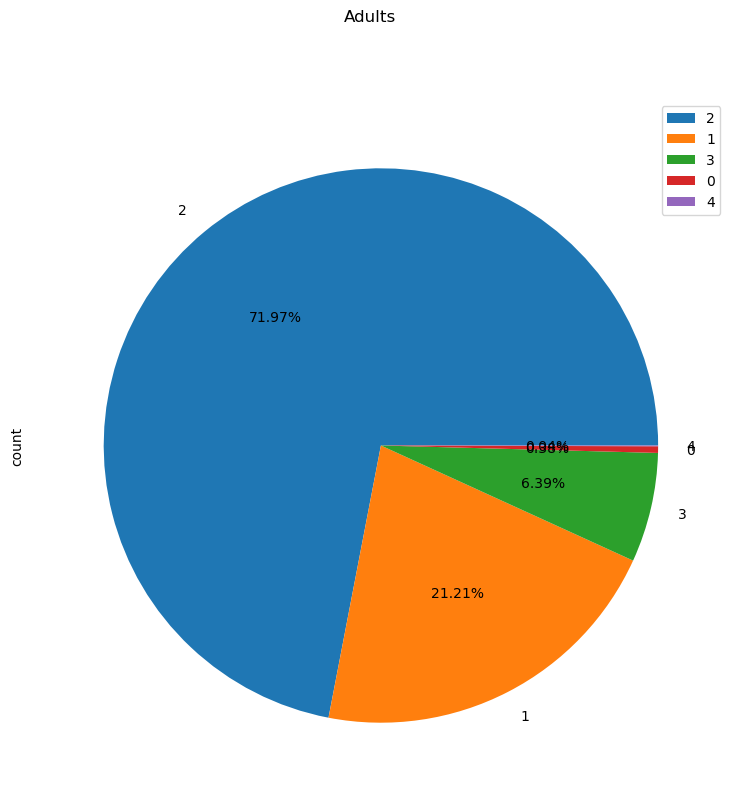

In [8]:
df.groupby('no_of_adults')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Adults',figsize=(9,9))

array([<AxesSubplot:ylabel='count'>], dtype=object)

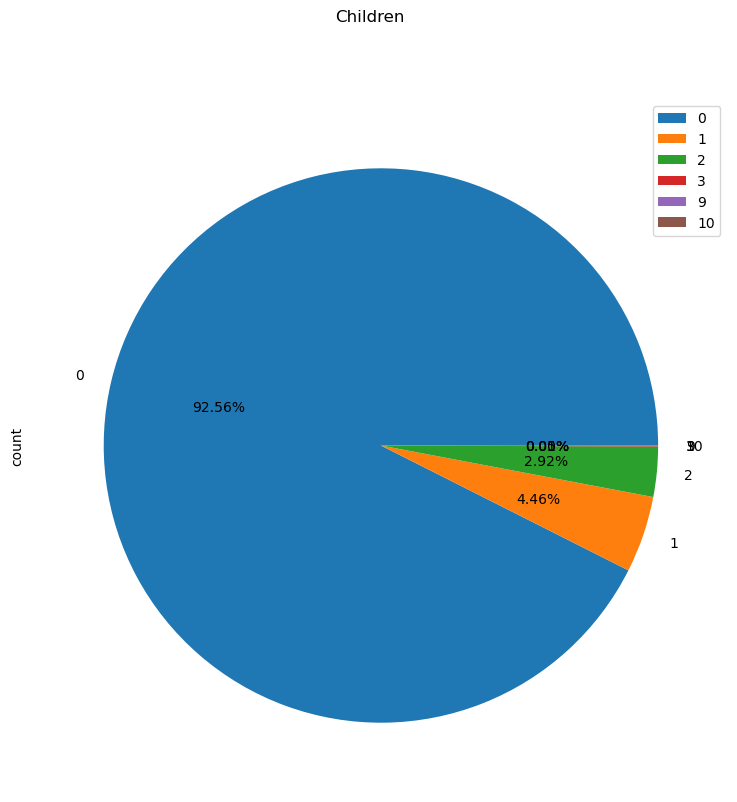

In [9]:
df.groupby('no_of_children')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Children',figsize=(9,9))

### Nights

<AxesSubplot:xlabel='no_of_weekend_nights'>

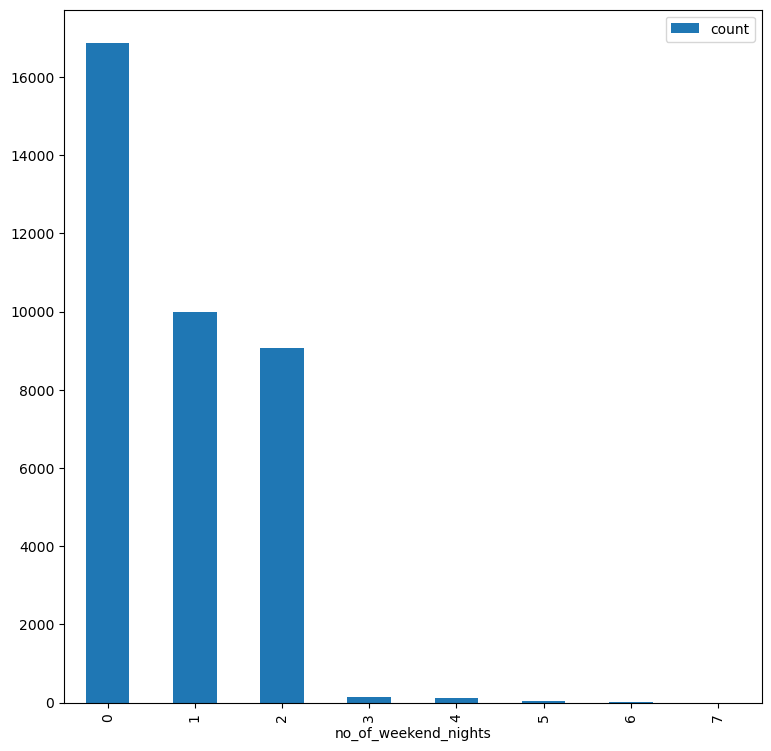

In [10]:
df.groupby('no_of_weekend_nights')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='bar',figsize=(9,9))

<Axes: ylabel='no_of_week_nights'>

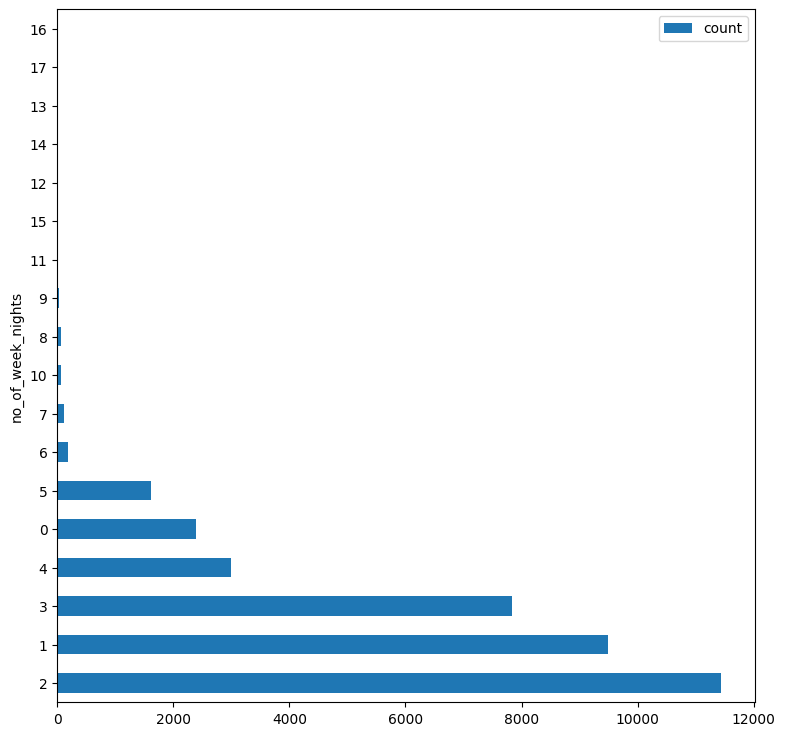

In [12]:
df.groupby('no_of_week_nights')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='barh',figsize=(9,9))

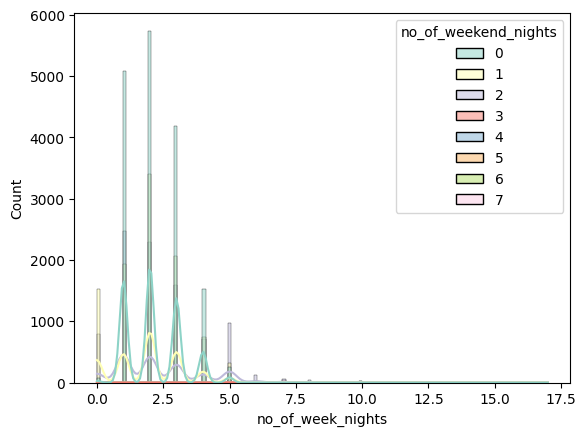

In [13]:
sns.histplot(x='no_of_week_nights',data=df,hue='no_of_weekend_nights',kde=True,palette='Set3');

### Meal plans

array([<Axes: ylabel='count'>], dtype=object)

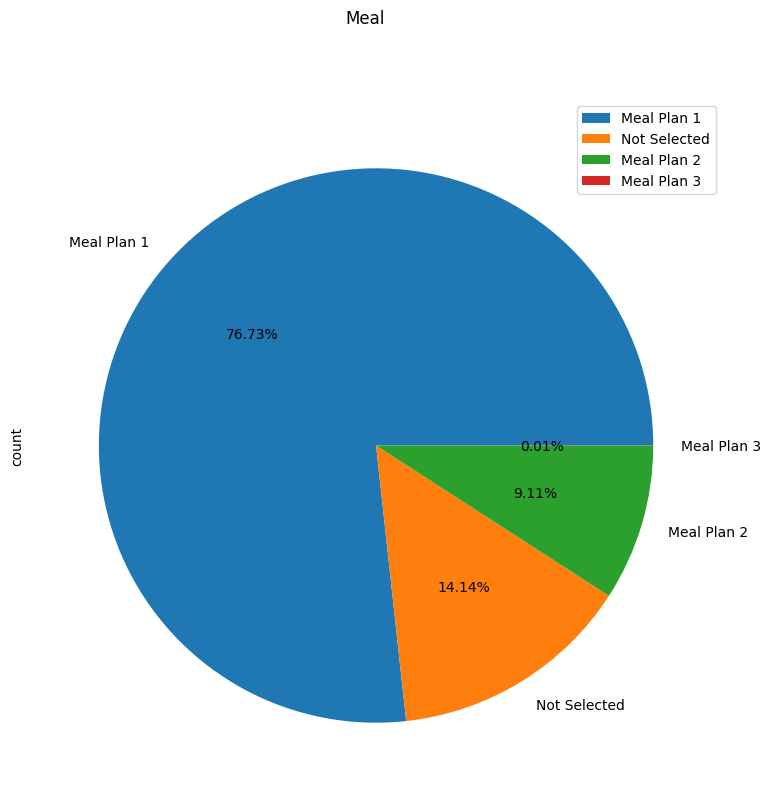

In [14]:
df.groupby('type_of_meal_plan')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Meal',figsize=(9,9))

### Parking spaces

array([<Axes: ylabel='count'>], dtype=object)

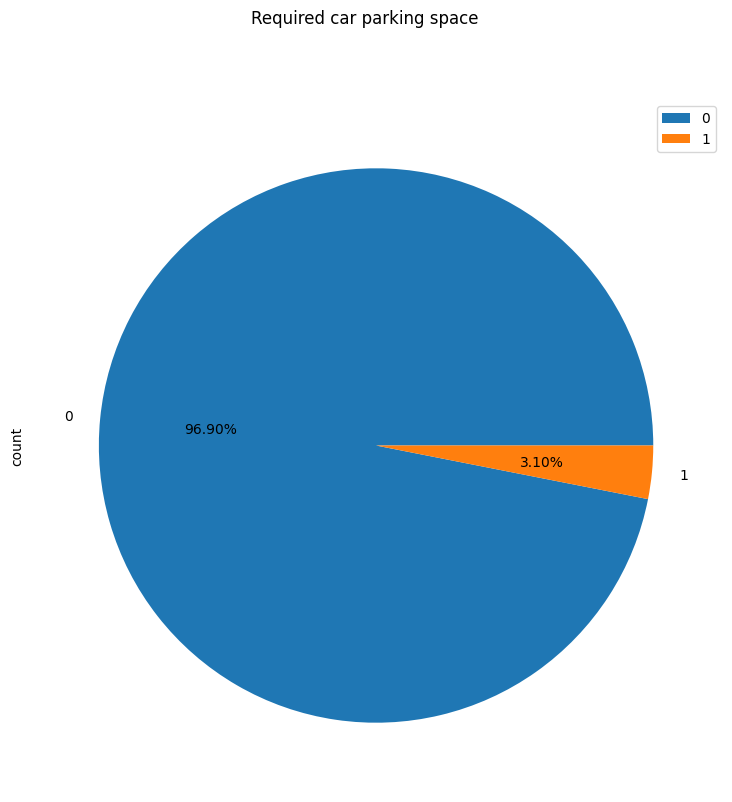

In [15]:
df.groupby('required_car_parking_space')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Required car parking space',figsize=(9,9))

### Room Type

<Axes: ylabel='room_type_reserved'>

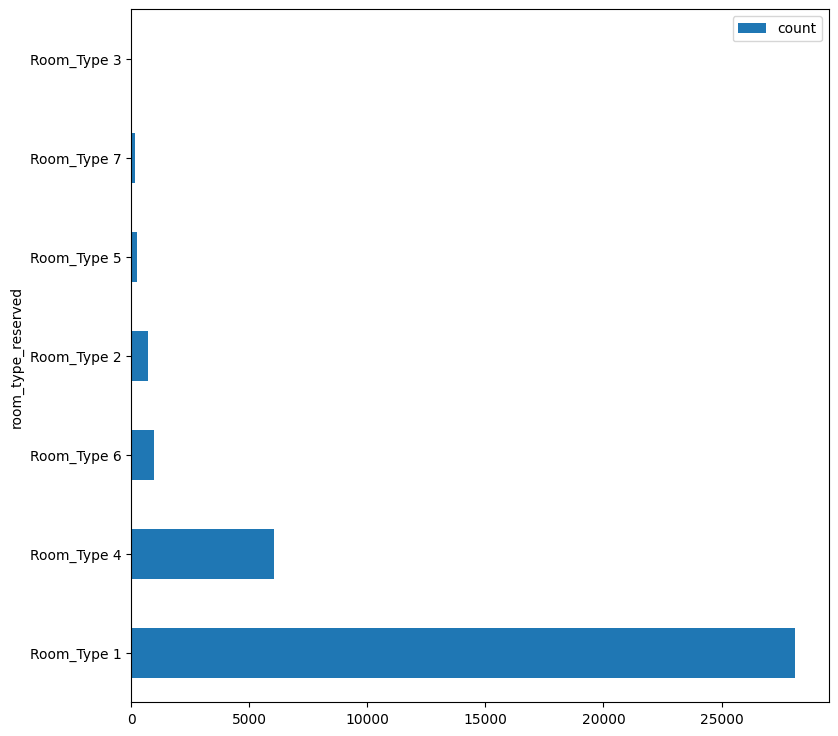

In [16]:
df.groupby('room_type_reserved')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='barh',figsize=(9,9))

### Distribution by years, months, seasons, days

array([<Axes: ylabel='count'>], dtype=object)

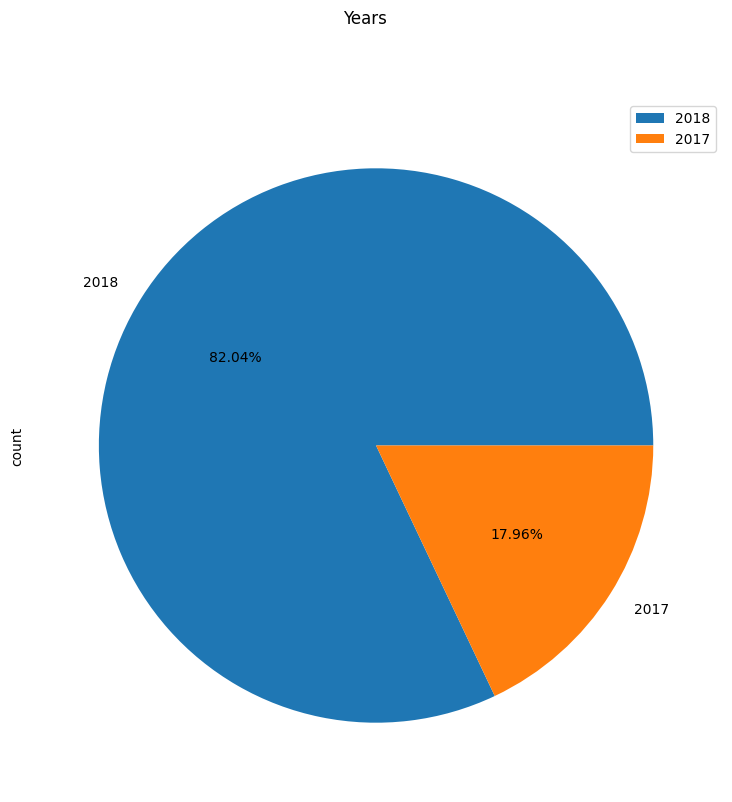

In [17]:
df.groupby('arrival_year')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Years',figsize=(9,9))


array([<Axes: ylabel='count'>], dtype=object)

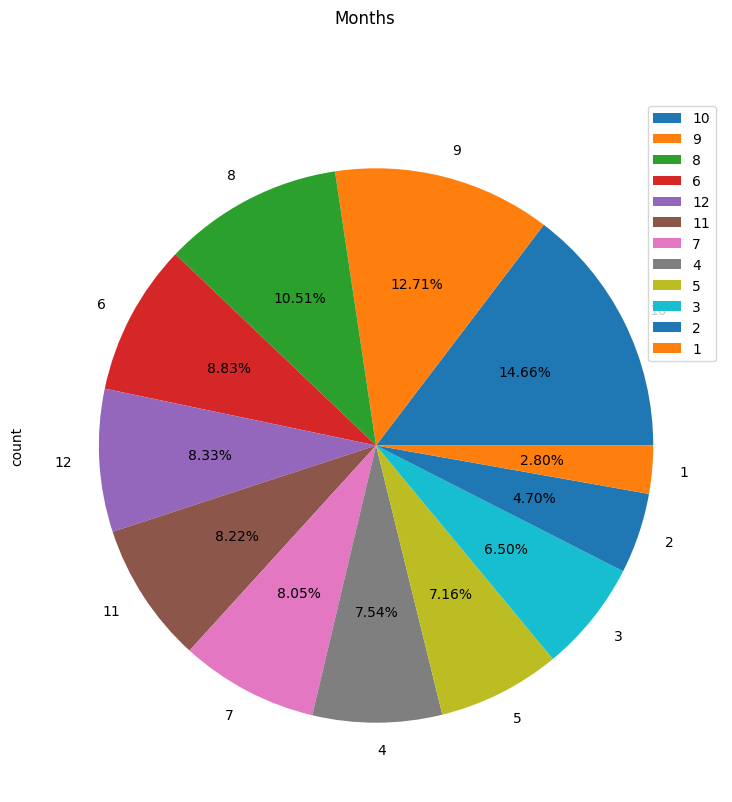

In [18]:
df.groupby('arrival_month')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Months',figsize=(9,9))

In [11]:
def season(x):
    if x in [9,10,11]:
        return 'Autumn'
    if x in [1,2,12]:
        return 'Winter'
    if x in [3,4,5]:
        return 'Spring'
    if x in [6,7,8]:
        return 'Summer'
    return x

In [12]:
df['season_group']=df['arrival_month'].apply(season)

array([<AxesSubplot:ylabel='count'>], dtype=object)

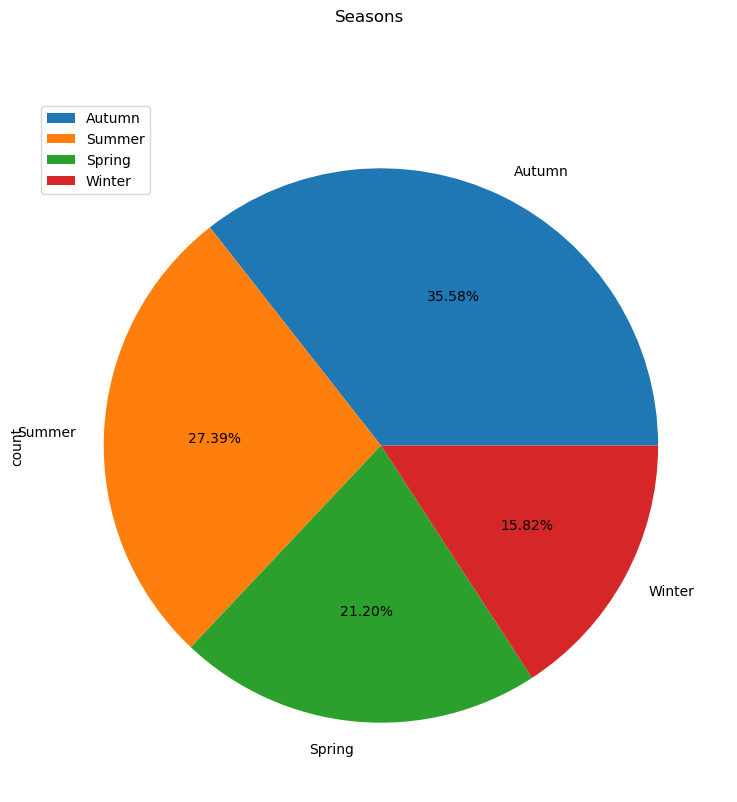

In [13]:
df.groupby('season_group')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Seasons',figsize=(9,9))

array([<AxesSubplot:ylabel='count'>], dtype=object)

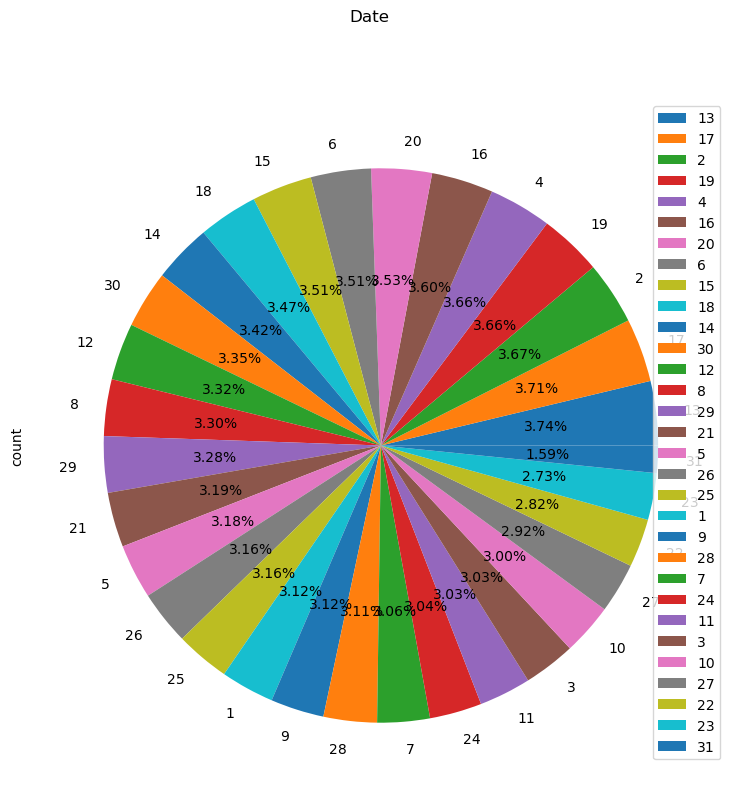

In [14]:
df.groupby('arrival_date')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Date',figsize=(9,9))

In [15]:
df.pivot_table(index='arrival_year',columns='arrival_month',values='arrival_date', aggfunc=(['count']))

count                                                          \
arrival_month      1       2       3       4       5       6       7       8    
arrival_year                                                                    
2017              NaN     NaN     NaN     NaN     NaN     NaN   363.0  1014.0   
2018           1014.0  1704.0  2358.0  2736.0  2598.0  3203.0  2557.0  2799.0   

                                               
arrival_month      9       10      11      12  
arrival_year                                   
2017           1649.0  1913.0   647.0   928.0  
2018           2962.0  3404.0  2333.0  2093.0

### Segments

array([<AxesSubplot:ylabel='count'>], dtype=object)

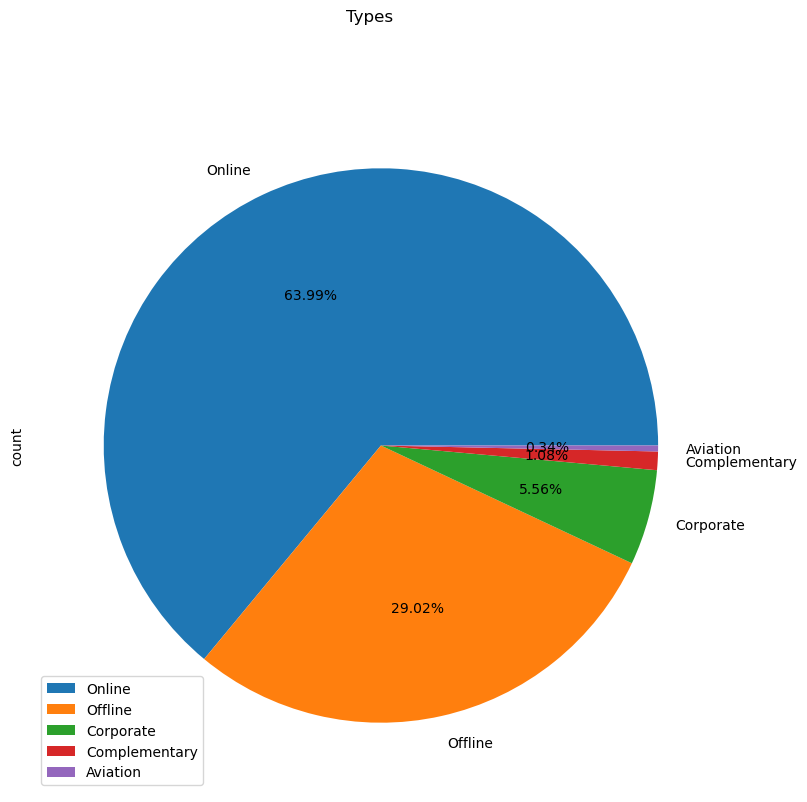

In [16]:
df.groupby('market_segment_type')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Types',figsize=(9,9))

### Repeated guest

array([<AxesSubplot:ylabel='count'>], dtype=object)

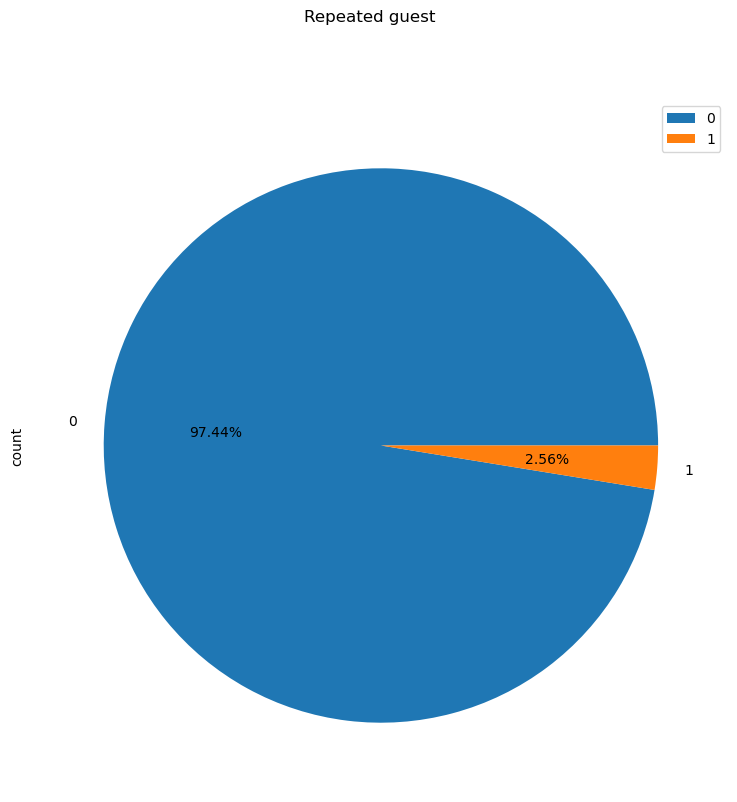

In [17]:
df.groupby('repeated_guest')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Repeated guest',figsize=(9,9))

### Cancellations in the past

array([<AxesSubplot:ylabel='count'>], dtype=object)

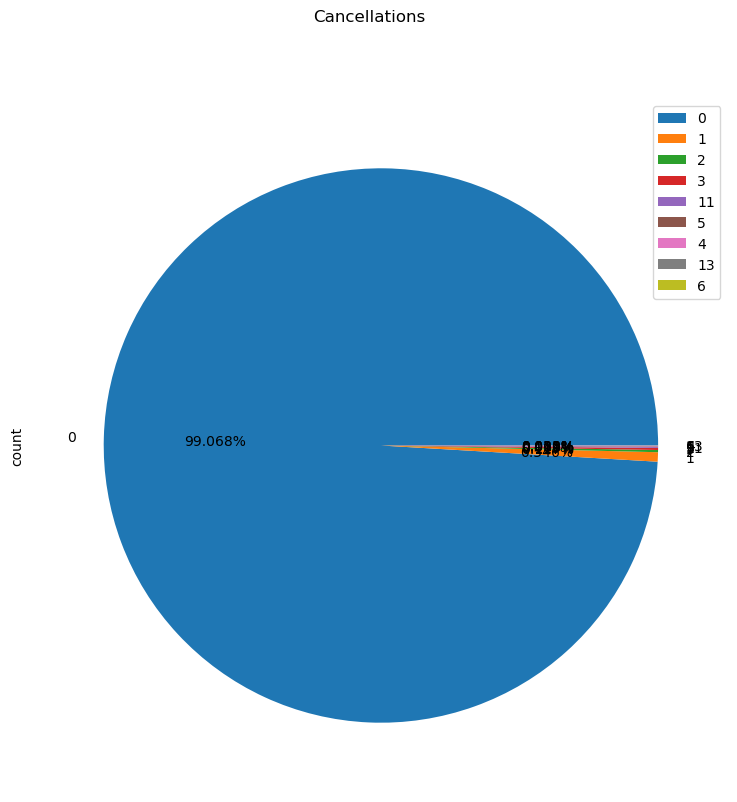

In [18]:
df.groupby('no_of_previous_cancellations')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.3f%%',subplots=True,title='Cancellations',figsize=(9,9))

### 0 cancellations

<AxesSubplot:title={'center':'0 cancellations'}, xlabel='no_of_previous_bookings_not_canceled'>

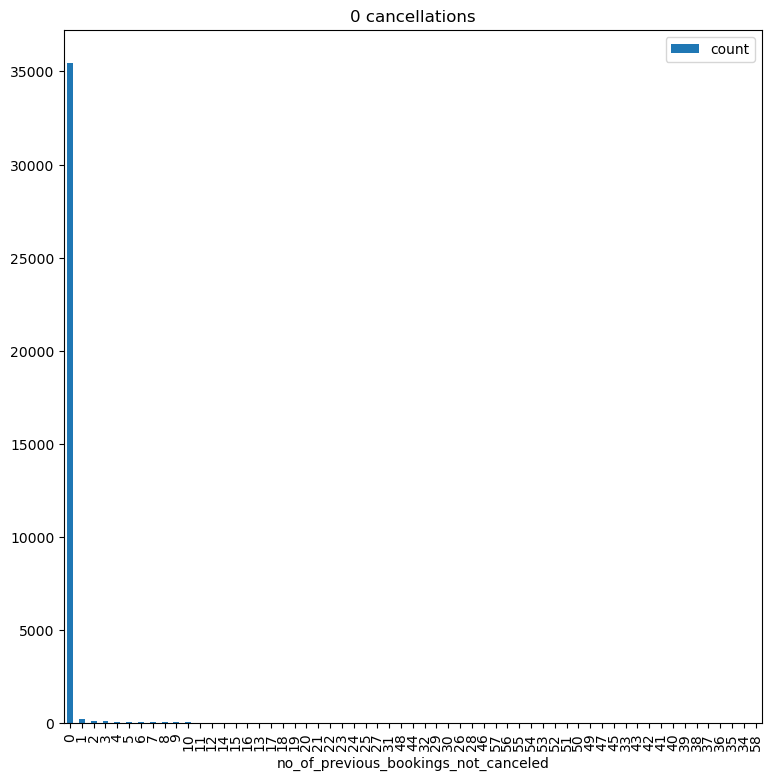

In [19]:
df.groupby('no_of_previous_bookings_not_canceled')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='bar',title='0 cancellations',figsize=(9,9))

### Average Price

In [20]:
def avg_price_per_room_group(x):
    if x <= 50.0 :
        x= 'price below 50'
    elif x >50.0 and x <=150.0:
        x= 'price from 50 to 150'
    elif x >150.0 and x <=300.0:
        x= 'price from 150 to 300'
    elif x >300.0 and x <=450.0:
        x= 'price from 300 to 450'
    else:
        x= 'price 450+'
    return x

In [21]:
df['price_per_room_group']=df['avg_price_per_room'].apply(avg_price_per_room_group)

<AxesSubplot:ylabel='price_per_room_group'>

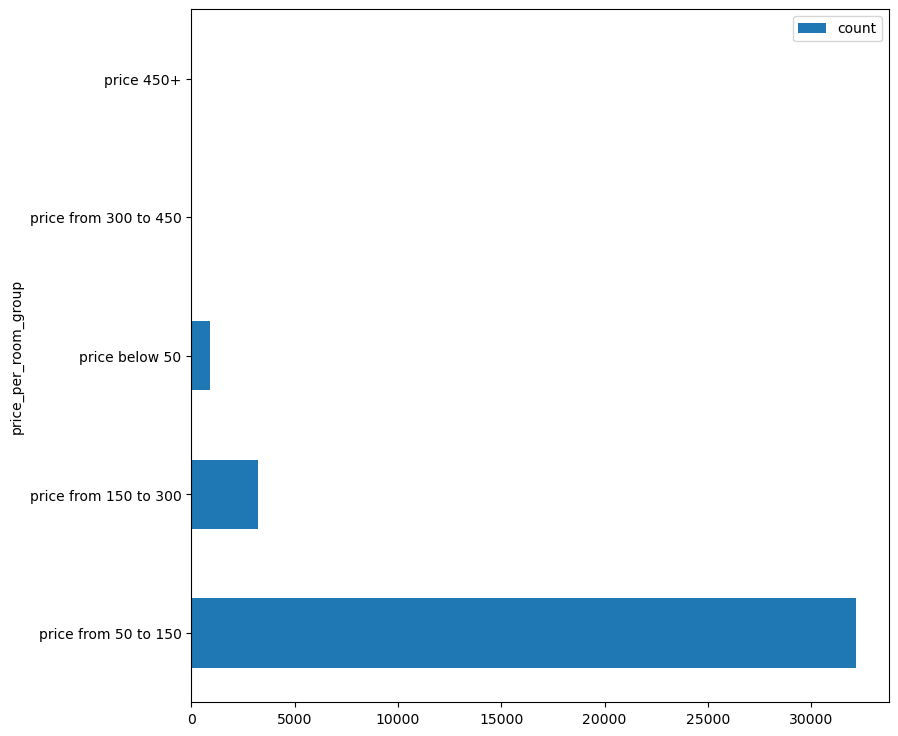

In [22]:
df.groupby('price_per_room_group')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='barh',figsize=(9,9))

### Special Requests

<AxesSubplot:xlabel='no_of_special_requests'>

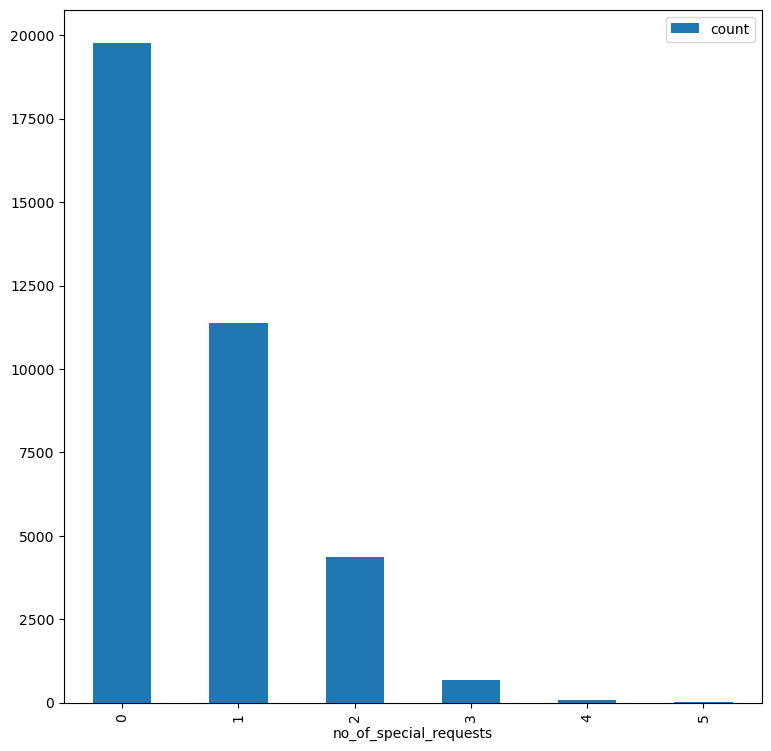

In [23]:
df.groupby('no_of_special_requests')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='bar',figsize=(9,9))

### Booking Status

array([<AxesSubplot:ylabel='count'>], dtype=object)

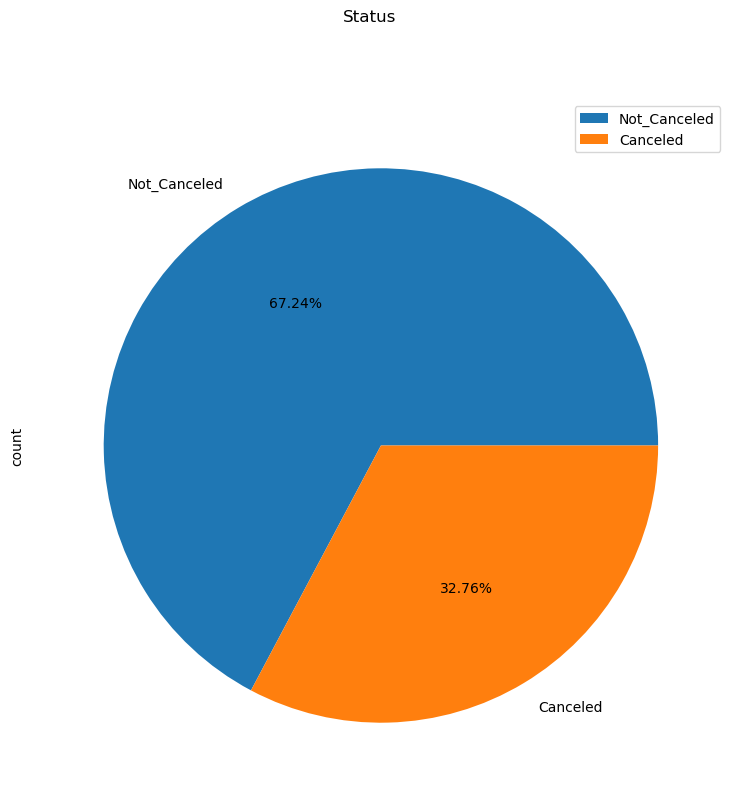

In [24]:
df.groupby('booking_status')['Booking_ID'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Status',figsize=(9,9))

In [25]:
# Drop the "Booking_ID" column
df.drop("Booking_ID", axis=1, inplace=True)
print("- Dropped 'Booking_ID' column")

- Dropped 'Booking_ID' column


## EDA - Pearson Correlation Heatmap


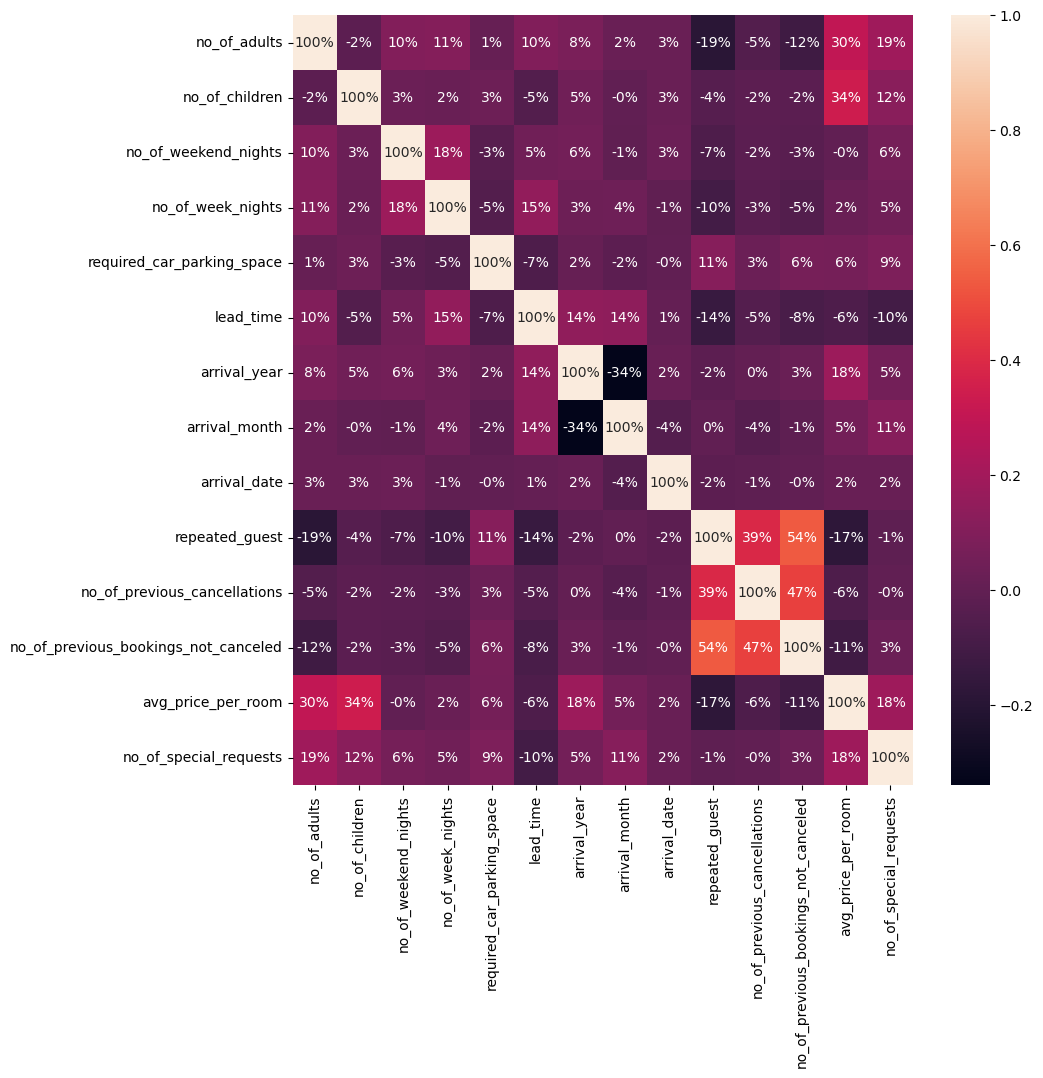

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.0%')
plt.show()

## EDA - FREQUENCY DISTRIBUTION

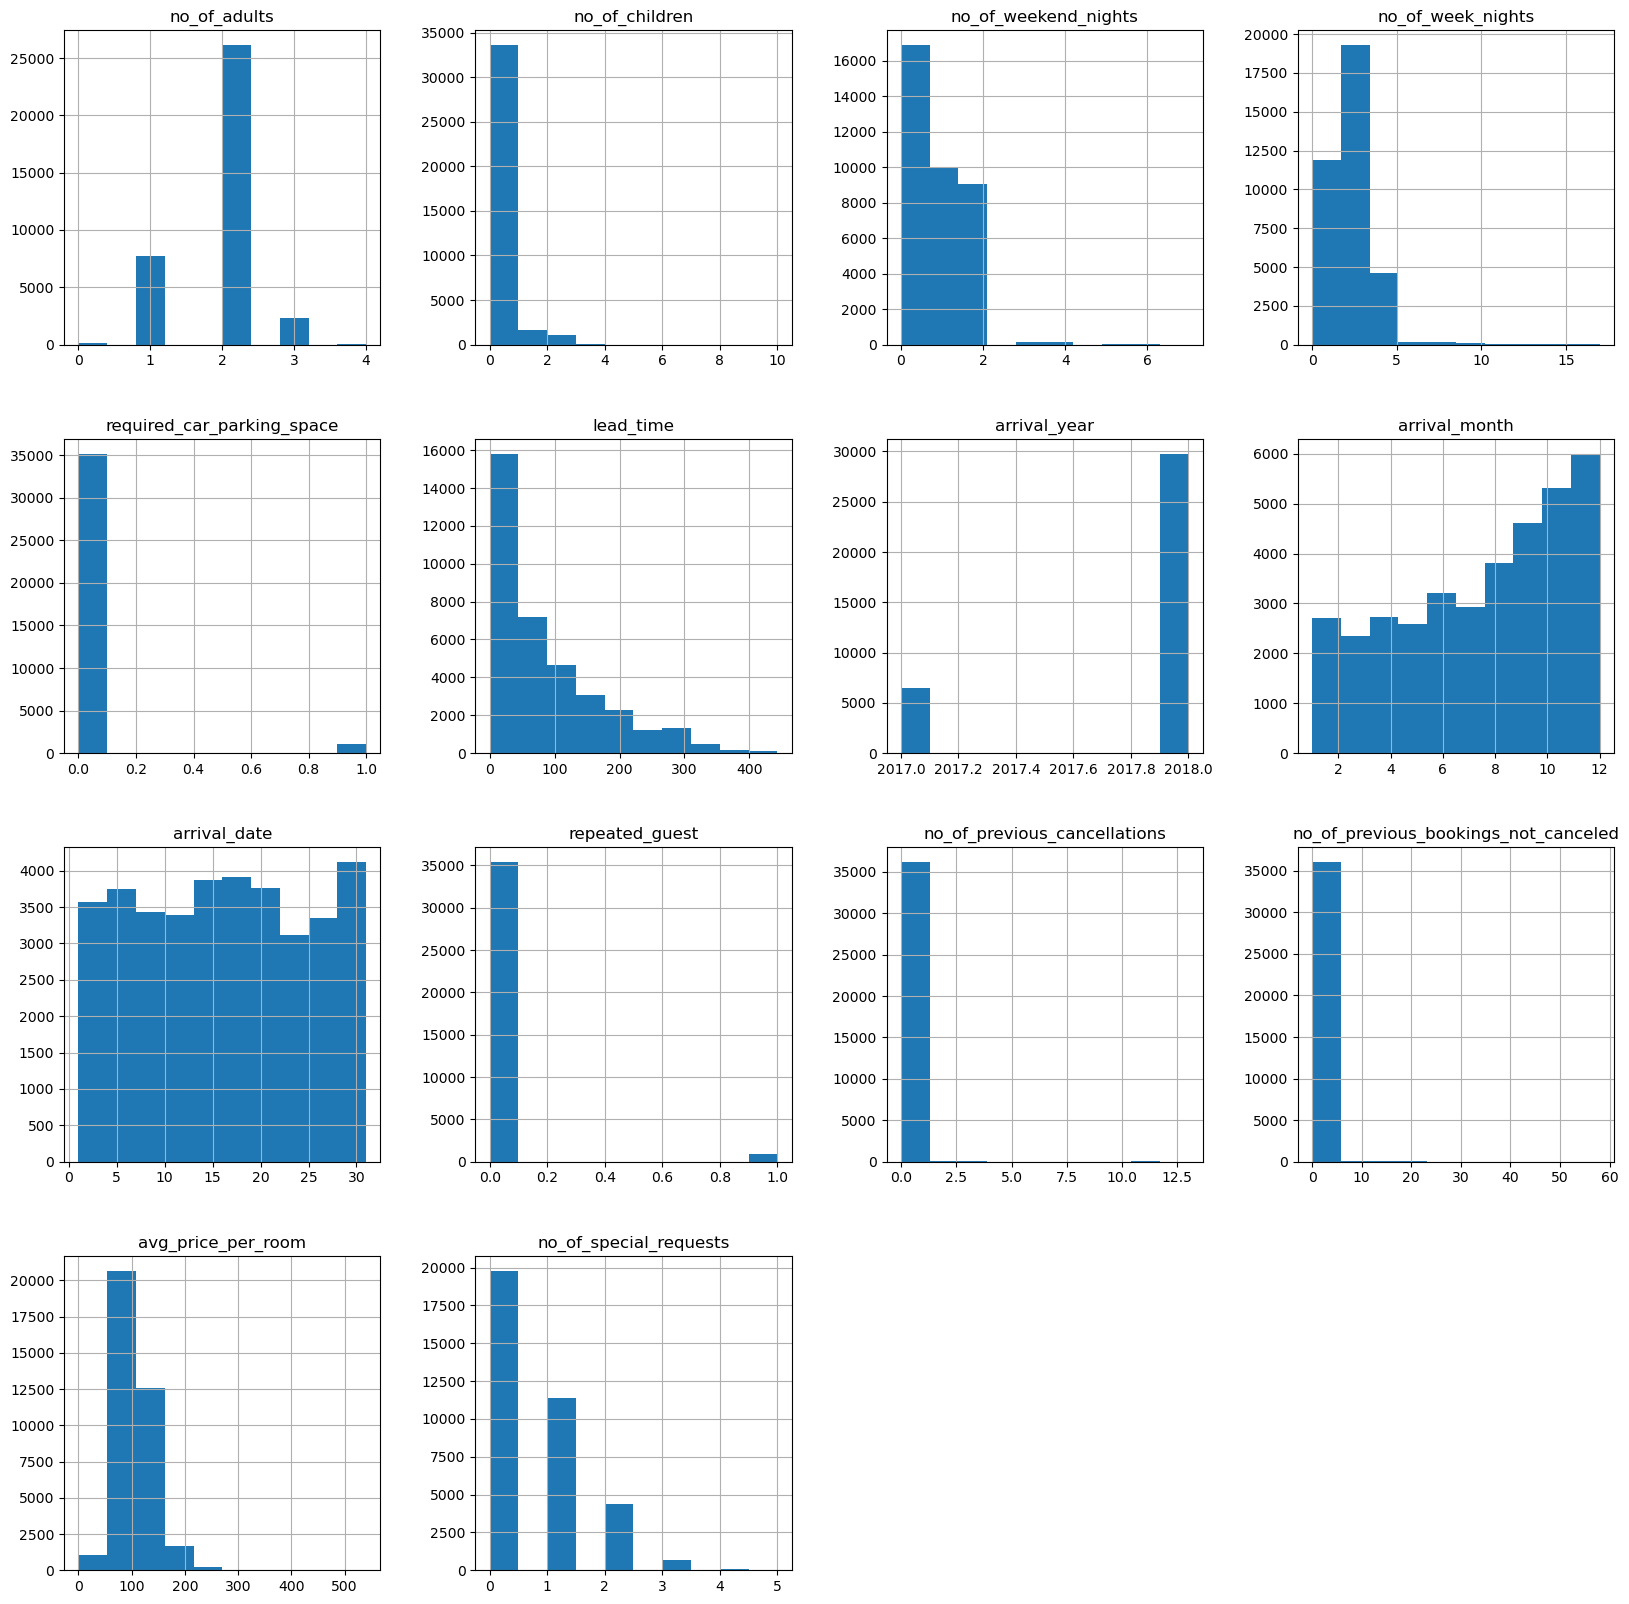

In [27]:
df.hist(figsize=(20, 20))
plt.show()

## Pre-processing the Data

In [28]:
# Finding the number of numerical and non-numerical columns
print("PRE CONVERSION\n Number of numerical columns: {}".format(df.select_dtypes(include=np.number).shape[1]))
print("\nPRE CONVERSION\n Number of non-numerical columns: {}".format(df.select_dtypes(exclude=np.number).shape[1]))

PRE CONVERSION
 Number of numerical columns: 14

PRE CONVERSION
 Number of non-numerical columns: 6


In [29]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,season_group,price_per_room_group
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,Autumn,price from 50 to 150
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,Autumn,price from 50 to 150
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,Winter,price from 50 to 150
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,Spring,price from 50 to 150
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,Spring,price from 50 to 150


In [30]:
# Define a dictionary of replacements to be made in the dataframe
replacements = {
    "booking_status": {"Not_Canceled": 0, "Canceled": 1},
    }

# Replace values in the dataframe using the dictionary
df.replace(replacements, inplace=True)


In [31]:
non_numeric_columns = list(df.select_dtypes(exclude=['number']).columns)


In [32]:
non_numeric_columns

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'season_group',
 'price_per_room_group']

In [33]:

# Apply one-hot encoding to each non-numerical column
for column in non_numeric_columns:
    # Generate the one-hot encoded variables for the current column
    dummies = pd.get_dummies(df[column], prefix=column)
    # Add the one-hot encoded variables to the original dataframe
    df = pd.concat([df, dummies], axis=1)
    # Remove the original column from the dataframe
    df.drop(column, axis=1, inplace=True)


In [34]:
# Show number of numerical and non-numerical columns in the dataframe
print("\nPOST CONVERSION\n Number of numerical columns: {}".format(df.select_dtypes(include=np.number).shape[1]))
print("\nPOST CONVERSION\n Number of non-numerical columns: {}".format(df.select_dtypes(exclude=np.number).shape[1]))


POST CONVERSION
 Number of numerical columns: 40

POST CONVERSION
 Number of non-numerical columns: 0


In [35]:
print("\nFIRST 15 ROWS")
df.head(15)


FIRST 15 ROWS


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,market_segment_type_Online,season_group_Autumn,season_group_Spring,season_group_Summer,season_group_Winter,price_per_room_group_price 450+,price_per_room_group_price below 50,price_per_room_group_price from 150 to 300,price_per_room_group_price from 300 to 450,price_per_room_group_price from 50 to 150
0,2,0,1,2,0,224,2017,10,2,0,...,0,1,0,0,0,0,0,0,0,1
1,2,0,2,3,0,5,2018,11,6,0,...,1,1,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,1,0,0,0,1,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,1,0,1,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,1,0,1,0,0,0,0,0,0,1
5,2,0,0,2,0,346,2018,9,13,0,...,1,1,0,0,0,0,0,0,0,1
6,2,0,1,3,0,34,2017,10,15,0,...,1,1,0,0,0,0,0,0,0,1
7,2,0,1,3,0,83,2018,12,26,0,...,1,0,0,0,1,0,0,0,0,1
8,3,0,0,4,0,121,2018,7,6,0,...,0,0,0,1,0,0,0,0,0,1
9,2,0,0,5,0,44,2018,10,18,0,...,1,1,0,0,0,0,0,0,0,1


## Checking for missing values

In [36]:
print("Total missing values is {}".format(df.isnull().sum().sum()))
print("\nMissing values by column is as follows:")
df.isnull().sum()

Total missing values is 0

Missing values by column is as follows:


no_of_adults                                  0
no_of_children                                0
no_of_weekend_nights                          0
no_of_week_nights                             0
required_car_parking_space                    0
lead_time                                     0
arrival_year                                  0
arrival_month                                 0
arrival_date                                  0
repeated_guest                                0
no_of_previous_cancellations                  0
no_of_previous_bookings_not_canceled          0
avg_price_per_room                            0
no_of_special_requests                        0
booking_status                                0
type_of_meal_plan_Meal Plan 1                 0
type_of_meal_plan_Meal Plan 2                 0
type_of_meal_plan_Meal Plan 3                 0
type_of_meal_plan_Not Selected                0
room_type_reserved_Room_Type 1                0
room_type_reserved_Room_Type 2          

## Taking care of outliers

In [37]:
print("Z=SCORE BASED OUTLIER REMOVAL\n")

target_column = 'booking_status'                                             

dataframe_final = df.copy()

# Separate the target column from the feature columns
target = dataframe_final[target_column]
features = dataframe_final.drop(target_column, axis=1)

# Remove outliers using the Z-Score method
z_scores = np.abs(stats.zscore(features))
features = features[(z_scores < 3).all(axis=1)]

# Get the cleaned feature indices
cleaned_feature_indices = features.index

# Combine the target column with the cleaned feature columns
dataframe_final = pd.concat([target.iloc[cleaned_feature_indices], features], axis=1)
dataframe_final.reset_index(drop=True, inplace=True)

print(f"PRE Z-SCORE OUTLIER REMOVAL - ROWS: {df.shape[0]}")
print(f"POST Z-SCORE OUTLIER REMOVAL - ROWS: {dataframe_final.shape[0]}")

Z=SCORE BASED OUTLIER REMOVAL

PRE Z-SCORE OUTLIER REMOVAL ROWS: 36275
POST Z-SCORE OUTLIER REMOVAL ROWS: 24752


In [38]:
dataframe_final


,booking_status,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,market_segment_type_Online,season_group_Autumn,season_group_Spring,season_group_Summer,season_group_Winter,price_per_room_group_price 450+,price_per_room_group_price below 50,price_per_room_group_price from 150 to 300,price_per_room_group_price from 300 to 450,price_per_room_group_price from 50 to 150
0,0,2,0,1,2,0,224,2017,10,2,...,0,1,0,0,0,0,0,0,0,1
1,0,2,0,2,3,0,5,2018,11,6,...,1,1,0,0,0,0,0,0,0,1
2,1,1,0,2,1,0,1,2018,2,28,...,1,0,0,0,1,0,0,0,0,1
3,1,2,0,0,2,0,211,2018,5,20,...,1,0,1,0,0,0,0,0,0,1
4,1,2,0,1,1,0,48,2018,4,11,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24747,1,2,0,1,0,0,49,2018,7,11,...,1,0,0,1,0,0,0,0,0,1
24748,1,1,0,0,3,0,166,2018,11,1,...,0,1,0,0,0,0,0,0,0,1
24749,1,2,0,1,3,0,228,2018,10,17,...,1,1,0,0,0,0,0,0,0,1
24750,0,2,0,2,6,0,148,2018,7,1,...,1,0,0,1,0,0,0,0,0,1


## Splitting the Data for Training and Testing

In [39]:
# SEE TOTAL SAMPLES FOR EACH CLASS
class_count = dataframe_final["booking_status"].value_counts()
print("\nTOTAL SAMPLES FOR EACH CLASS")
print(class_count)


TOTAL SAMPLES FOR EACH CLASS
0    16214
1     8538
Name: booking_status, dtype: int64


In [40]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 861.6 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 1.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
X = dataframe_final.drop('booking_status', axis=1)
y = dataframe_final['booking_status']

In [43]:
# Apply SMOTE to oversample minority class
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Create new balanced DataFrame
balanced_df = pd.concat([X_res, y_res], axis=1)


In [44]:
# SEE TOTAL SAMPLES FOR EACH CLASS
class_count = balanced_df["booking_status"].value_counts()
print("\nTOTAL SAMPLES FOR EACH CLASS")
print(class_count)


TOTAL SAMPLES FOR EACH CLASS
0    16214
1    16214
Name: booking_status, dtype: int64


In [45]:
X = balanced_df.drop('booking_status', axis=1)
y = balanced_df['booking_status']

In [46]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## SCALE DATA

In [47]:
# Scale the training and testing data using ZScoreScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print("DATA SCALED VIA Z-SCORE")

DATA SCALED VIA Z-SCORE


# USING DIFFERENT MACHINE LEARNING ALGORITHMS

## 1. Random Forest Model

In [ ]:
rf = RandomForestClassifier(random_state=42)

# Define a dictionary of all the parameters to tune
params_rf = {'n_estimators': [100, 200, 300],
             'max_depth': [2, 4, 6, 8, 10],
             'min_samples_split': [2, 5, 10, 15],
             'min_samples_leaf': [1, 2, 5, 10]}

# Use grid search to test all possible combinations of parameters
grid = GridSearchCV(rf, params_rf, cv=5, verbose=1, n_jobs=-1)

# Fit the model to the training data and print the best parameters
grid.fit(X_train, y_train)
print(f"Best parameters: {grid.best_params_}")

# Update the existing model with the best parameters
rf.set_params(**grid.best_params_)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)


Fitting 5 folds for each of 240 candidates, totalling 1200 fits



KeyboardInterrupt



## Results and Evaluation

In [ ]:
best_params = grid.best_params_
train_accuracy = accuracy_score(y_train, rf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
train_precision = precision_score(y_train, rf.predict(X_train))
test_precision = precision_score(y_test, y_pred)
train_recall = recall_score(y_train, rf.predict(X_train))
test_recall = recall_score(y_test, y_pred)
train_f1_score = f1_score(y_train, rf.predict(X_train))
test_f1_score = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"BEST PARAMETERS:\n {best_params}\n")
print(f"TRAINING ACCURACY: {train_accuracy:.2%}")
print(f"TESTING ACCURACY: {test_accuracy:.2%}\n")
print(f"TRAINING PRECISION: {train_precision:.2%}")
print(f"TESTING PRECISION: {test_precision:.2%}\n")
print(f"TRAINING RECALL: {train_recall:.2%}")
print(f"TESTING RECALL: {test_recall:.2%}\n")
print(f"TRAINING F1 SCORE: {train_f1_score:.2%}")
print(f"TESTING F1 SCORE: {test_f1_score:.2%}\n")
print(f"CONFUSION MATRIX:\n {conf_matrix}")

## Prediction Plots

In [ ]:
num_correct = accuracy_score(y_test, y_pred)
num_incorrect = 1 - num_correct

sns.set(style='whitegrid', context='poster', palette='colorblind', rc={'figure.figsize': (12, 8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[num_correct, num_incorrect])
plt.title('RANDOM FOREST CORRECT VS INCORRECT PREDICTIONS')
plt.show()

## Feature importance plot

In [ ]:
# Create a figure and axis objects using matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the feature importance of the classifier using seaborn
sns.set_style('whitegrid')
sns.set_context('poster')
sns.set_palette('colorblind')
sns.barplot(x=rf.feature_importances_, y=X.columns, ax=ax)
ax.set_title('FEATURE IMPORTANCE')

# Display the plot
plt.show()


# 2. KNN Model 

In [48]:
neighbours_size=[3,5,10]
for i in neighbours_size:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    Y_pred = knn.predict(X_test)
    print("The Classifiction models for KNN methodology for k Value = ",i)
    print("The Score is -",knn.score(X_test, y_test))
    print("The Confusion Matrix is -")
    print(confusion_matrix(y_test,Y_pred))
    print("The Classification Report Matrix is -")
    print(classification_report(y_test,Y_pred))

The Classifiction models for KNN methodology for k Value =  3
The Score is - 0.8604173090759585
The Confusion Matrix is -
[[4142  688]
 [ 670 4229]]
The Classification Report Matrix is -
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4830
           1       0.86      0.86      0.86      4899

    accuracy                           0.86      9729
   macro avg       0.86      0.86      0.86      9729
weighted avg       0.86      0.86      0.86      9729

The Classifiction models for KNN methodology for k Value =  5
The Score is - 0.85877274128893
The Confusion Matrix is -
[[4122  708]
 [ 666 4233]]
The Classification Report Matrix is -
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      4830
           1       0.86      0.86      0.86      4899

    accuracy                           0.86      9729
   macro avg       0.86      0.86      0.86      9729
weighted avg       0.86      

## Prediction Plot

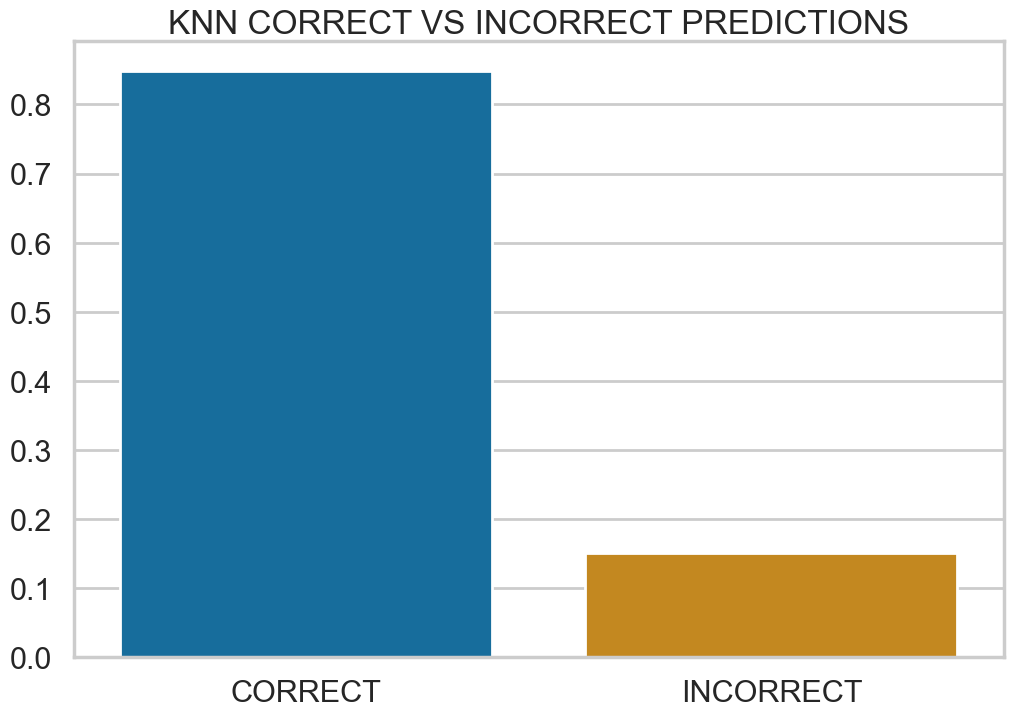

In [49]:
num_correct = accuracy_score(y_test, Y_pred)
num_incorrect = 1 - num_correct

sns.set(style='whitegrid', context='poster', palette='colorblind', rc={'figure.figsize': (12, 8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[num_correct, num_incorrect])
plt.title('KNN CORRECT VS INCORRECT PREDICTIONS')
plt.show()

## GRADIENT BOOSTING

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = np.array([300])
learning_rate = np.array([0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model = GradientBoostingClassifier()
gridGradient = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)
gridGradient.fit(X_train, y_train)

/Users/naveenrenji/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 0.3302423  -0.19530272  1.50721052 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 ...
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]] loaded from the file /var/folders/3l/gn284k9165ggq_n5xs4j4dm40000gn/T/joblib_memmapping_folder_79014_21c36dc864cf4d969f3927abbf687b15_ac06f42340ea4945bce8b34bc27ee303/79014-140513088926720-b39c42542d844b5a8a3a413cca79ef6a.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.

/Users/naveenrenji/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 0.3302423  -0.19530272  1.50721052 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 ...
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]] loaded from the file /var/folders/3l/gn284k9165ggq_n5xs4j4dm40000gn/T/joblib_memmapping_folder_79014_21c36dc864cf4d969f3927abbf687b15_ac06f42340ea4945bce8b34bc27ee303/79014-140513088926720-b39c42542d844b5a8a3a413cca79ef6a.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.

/Users/naveenrenji/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 0.3302423  -0.19530272  1.50721052 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 ...
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]] loaded from the file /var/folders/3l/gn284k9165ggq_n5xs4j4dm40000gn/T/joblib_memmapping_folder_79014_21c36dc864cf4d969f3927abbf687b15_ac06f42340ea4945bce8b34bc27ee303/79014-140513088926720-b39c42542d844b5a8a3a413cca79ef6a.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.

/Users/naveenrenji/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 0.3302423  -0.19530272  1.50721052 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 ...
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]] loaded from the file /var/folders/3l/gn284k9165ggq_n5xs4j4dm40000gn/T/joblib_memmapping_folder_79014_21c36dc864cf4d969f3927abbf687b15_ac06f42340ea4945bce8b34bc27ee303/79014-140513088926720-b39c42542d844b5a8a3a413cca79ef6a.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.

/Users/naveenrenji/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 0.3302423  -0.19530272  1.50721052 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 ...
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]] loaded from the file /var/folders/3l/gn284k9165ggq_n5xs4j4dm40000gn/T/joblib_memmapping_folder_79014_21c36dc864cf4d969f3927abbf687b15_ac06f42340ea4945bce8b34bc27ee303/79014-140513088926720-b39c42542d844b5a8a3a413cca79ef6a.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.

/Users/naveenrenji/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 0.3302423  -0.19530272  1.50721052 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 ...
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]] loaded from the file /var/folders/3l/gn284k9165ggq_n5xs4j4dm40000gn/T/joblib_memmapping_folder_79014_21c36dc864cf4d969f3927abbf687b15_ac06f42340ea4945bce8b34bc27ee303/79014-140513088926720-b39c42542d844b5a8a3a413cca79ef6a.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.01 , 0.02 , 0.05 , 0.07 , 0.09 , 0.1  , 0.3  , 0.5  , 0.005]),
                         'n_estimators': array([300])})

In [51]:
print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.5
Score:  0.8905240825231739


In [52]:
grad_boost = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.5, random_state = 0)
grad_boost.fit(X_train, y_train)
previsoes = grad_boost.predict(X_test)

In [53]:
print("The Confusion Matrix is -")
print(confusion_matrix(y_test,previsoes))
print("The Classification Report Matrix is -")
print(classification_report(y_test,previsoes))

The Confusion Matrix is -
[[4326  504]
 [ 545 4354]]
The Classification Report Matrix is -
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4830
           1       0.90      0.89      0.89      4899

    accuracy                           0.89      9729
   macro avg       0.89      0.89      0.89      9729
weighted avg       0.89      0.89      0.89      9729



## Prediction Plots

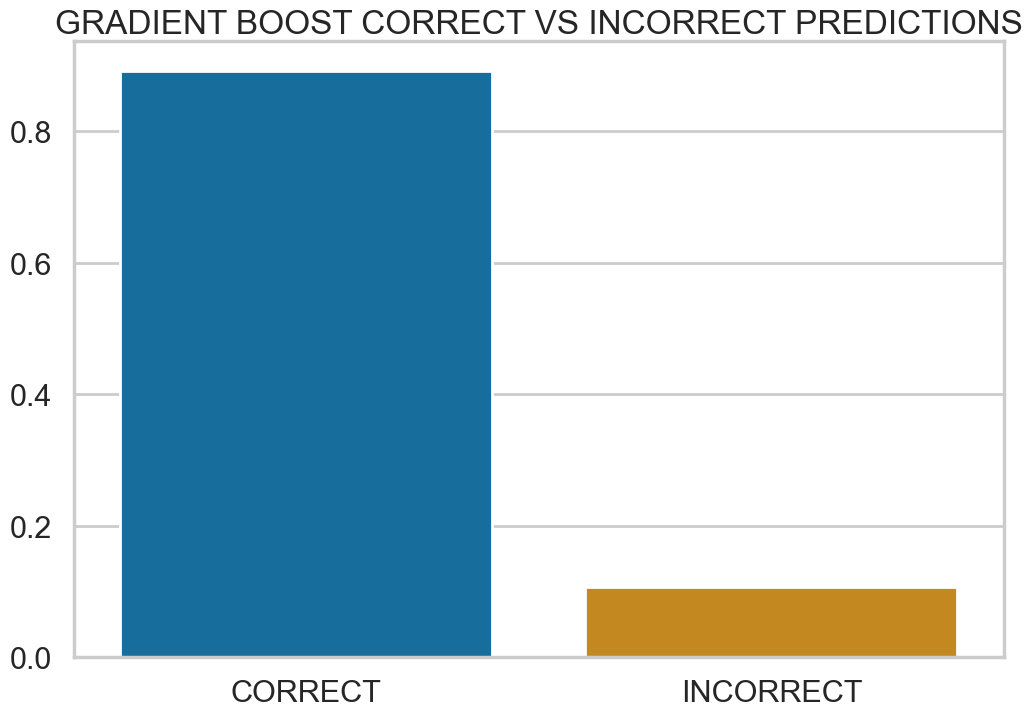

In [54]:
num_correct = accuracy_score(y_test, previsoes)
num_incorrect = 1 - num_correct

sns.set(style='whitegrid', context='poster', palette='colorblind', rc={'figure.figsize': (12, 8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[num_correct, num_incorrect])
plt.title('GRADIENT BOOST CORRECT VS INCORRECT PREDICTIONS')
plt.show()

## ADABOOST

In [55]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators = np.array([500])
learning_rate = np.array([2.0, 2.5, 1.9, 1.7, 0.5, 0.4])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model = AdaBoostClassifier()
gridAdaBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)
gridAdaBoost.fit(X_train, y_train)

/Users/naveenrenji/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 0.3302423  -0.19530272  1.50721052 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 ...
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]] loaded from the file /var/folders/3l/gn284k9165ggq_n5xs4j4dm40000gn/T/joblib_memmapping_folder_79014_21c36dc864cf4d969f3927abbf687b15_8d91062813ff4c59b35241c73f22d8ac/79014-140513088926720-b39c42542d844b5a8a3a413cca79ef6a.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.

/Users/naveenrenji/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 0.3302423  -0.19530272  1.50721052 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 ...
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]] loaded from the file /var/folders/3l/gn284k9165ggq_n5xs4j4dm40000gn/T/joblib_memmapping_folder_79014_21c36dc864cf4d969f3927abbf687b15_8d91062813ff4c59b35241c73f22d8ac/79014-140513088926720-b39c42542d844b5a8a3a413cca79ef6a.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.

/Users/naveenrenji/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 0.3302423  -0.19530272  1.50721052 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 ...
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]] loaded from the file /var/folders/3l/gn284k9165ggq_n5xs4j4dm40000gn/T/joblib_memmapping_folder_79014_21c36dc864cf4d969f3927abbf687b15_8d91062813ff4c59b35241c73f22d8ac/79014-140513088926720-b39c42542d844b5a8a3a413cca79ef6a.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.

/Users/naveenrenji/opt/anaconda3/lib/python3.9/site-packages/joblib/numpy_pickle.py:230: UserWarning: The memmapped array [[ 0.3302423  -0.19530272  1.50721052 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 ...
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]
 [ 0.3302423  -0.19530272 -0.97265115 ...  0.          0.
   0.        ]] loaded from the file /var/folders/3l/gn284k9165ggq_n5xs4j4dm40000gn/T/joblib_memmapping_folder_79014_21c36dc864cf4d969f3927abbf687b15_8d91062813ff4c59b35241c73f22d8ac/79014-140513088926720-b39c42542d844b5a8a3a413cca79ef6a.pkl is not not bytes aligned. This may cause segmentation faults if this memmapped array is used in some libraries like BLAS or PyTorch. To get rid of this warning, regenerate your pickle file with joblib >= 1.2.

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([2. , 2.5, 1.9, 1.7, 0.5, 0.4]),
                         'n_estimators': array([500])})

In [56]:
print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  1.7
Score:  0.8428571179003701


In [57]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 1.9, random_state = 0)
ada_boost.fit(X_train, y_train)
y_pred_AB = ada_boost.predict(X_test)

In [58]:
print("The Confusion Matrix is -")
print(confusion_matrix(y_test,y_pred_AB))
print("The Classification Report Matrix is -")
print(classification_report(y_test,y_pred_AB))

The Confusion Matrix is -
[[4088  742]
 [ 793 4106]]
The Classification Report Matrix is -
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4830
           1       0.85      0.84      0.84      4899

    accuracy                           0.84      9729
   macro avg       0.84      0.84      0.84      9729
weighted avg       0.84      0.84      0.84      9729



### PREDICTION PLOTS

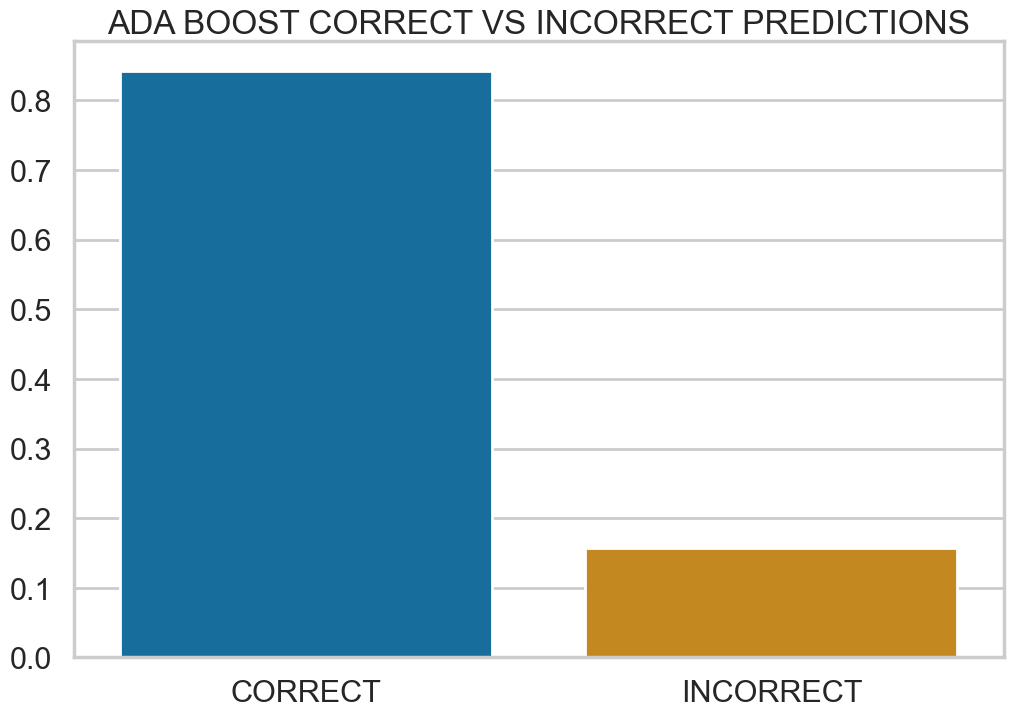

In [59]:
num_correct = accuracy_score(y_test, y_pred_AB)
num_incorrect = 1 - num_correct

sns.set(style='whitegrid', context='poster', palette='colorblind', rc={'figure.figsize': (12, 8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[num_correct, num_incorrect])
plt.title('ADA BOOST CORRECT VS INCORRECT PREDICTIONS')
plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression().fit(X_train, y_train)

In [ ]:
y_pred_log = log_model.predict(X_test)

In [ ]:
print("The Confusion Matrix is -")
print(confusion_matrix(y_test,y_pred_log))
print("The Classification Report Matrix is -")
print(classification_report(y_test,y_pred_log))

The Confusion Matrix is -
[[3948  882]
 [1043 3856]]
The Classification Report Matrix is -
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      4830
           1       0.81      0.79      0.80      4899

    accuracy                           0.80      9729
   macro avg       0.80      0.80      0.80      9729
weighted avg       0.80      0.80      0.80      9729



### PREDICTION PLOTS

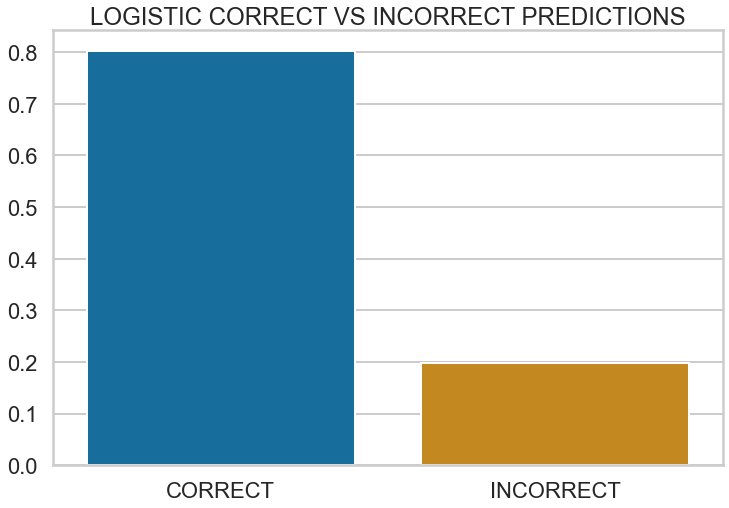

In [ ]:
num_correct = accuracy_score(y_test, y_pred_log)
num_incorrect = 1 - num_correct

sns.set(style='whitegrid', context='poster', palette='colorblind', rc={'figure.figsize': (12, 8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[num_correct, num_incorrect])
plt.title('LOGISTIC CORRECT VS INCORRECT PREDICTIONS')
plt.show()

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

dtree_grid_search(X_train, y_train, 5)

{'criterion': 'gini', 'max_depth': 13}

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini', max_depth=13).fit(X_train, y_train)

In [ ]:
y_pred_tree = dtree.predict(X_test)

In [ ]:
print("The Confusion Matrix is -")
print(confusion_matrix(y_test,y_pred_tree))
print("The Classification Report Matrix is -")
print(classification_report(y_test,y_pred_tree))

The Confusion Matrix is -
[[4247  583]
 [ 569 4330]]
The Classification Report Matrix is -
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4830
           1       0.88      0.88      0.88      4899

    accuracy                           0.88      9729
   macro avg       0.88      0.88      0.88      9729
weighted avg       0.88      0.88      0.88      9729



### PREDICTION PLOTS

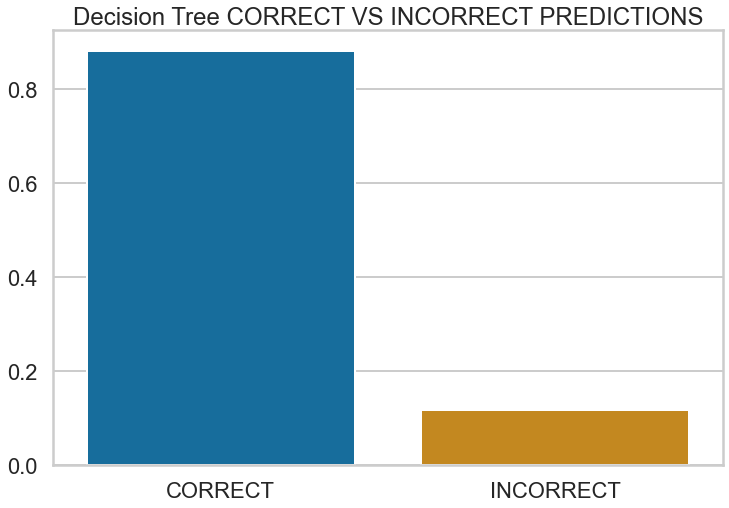

In [ ]:
num_correct = accuracy_score(y_test, y_pred_tree)
num_incorrect = 1 - num_correct

sns.set(style='whitegrid', context='poster', palette='colorblind', rc={'figure.figsize': (12, 8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[num_correct, num_incorrect])
plt.title('Decision Tree CORRECT VS INCORRECT PREDICTIONS')
plt.show()

## LightGBM

In [ ]:
import lightgbm as ltb

lightgbm = ltb.LGBMClassifier().fit(X_train, y_train)

In [ ]:
y_pred_light = lightgbm.predict(X_test)

In [ ]:
print("The Confusion Matrix is -")
print(confusion_matrix(y_test,y_pred_light))
print("The Classification Report Matrix is -")
print(classification_report(y_test,y_pred_light))

The Confusion Matrix is -
[[4357  473]
 [ 568 4331]]
The Classification Report Matrix is -
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4830
           1       0.90      0.88      0.89      4899

    accuracy                           0.89      9729
   macro avg       0.89      0.89      0.89      9729
weighted avg       0.89      0.89      0.89      9729



### PREDICTION PLOTS

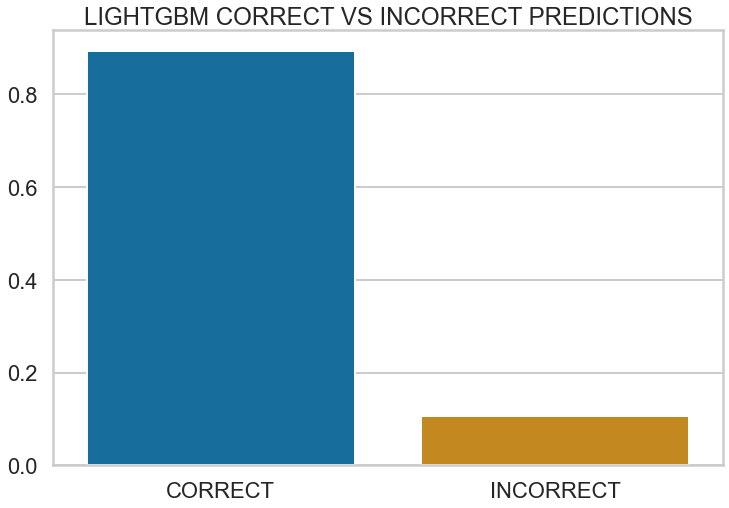

In [ ]:
num_correct = accuracy_score(y_test, y_pred_light)
num_incorrect = 1 - num_correct

sns.set(style='whitegrid', context='poster', palette='colorblind', rc={'figure.figsize': (12, 8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[num_correct, num_incorrect])
plt.title('LIGHTGBM CORRECT VS INCORRECT PREDICTIONS')
plt.show()

## CatBoost

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.039079
0:	learn: 0.6594777	total: 166ms	remaining: 2m 46s
1:	learn: 0.6395330	total: 182ms	remaining: 1m 30s
2:	learn: 0.6204901	total: 194ms	remaining: 1m 4s
3:	learn: 0.6015935	total: 207ms	remaining: 51.4s
4:	learn: 0.5838573	total: 217ms	remaining: 43.3s
5:	learn: 0.5668858	total: 231ms	remaining: 38.3s
6:	learn: 0.5507735	total: 245ms	remaining: 34.7s
7:	learn: 0.5374855	total: 257ms	remaining: 31.9s
8:	learn: 0.5261762	total: 271ms	remaining: 29.9s
9:	learn: 0.5144973	total: 286ms	remaining: 28.3s
10:	learn: 0.5059602	total: 299ms	remaining: 26.9s
11:	learn: 0.4953663	total: 312ms	remaining: 25.7s
12:	learn: 0.4876826	total: 326ms	remaining: 24.8s
13:	learn: 0.4798318	total: 340ms	remaining: 24s
14:	learn: 0.4736582	total: 354ms	remaining: 23.2s
15:	learn: 0.4677594	total: 367ms	remaining: 22.6s
16:	learn: 0.4614727	total: 380ms	remaining: 22s
17:	learn: 0.4568488	total: 393ms	remaining: 21.5s
18:	learn: 0.4525248	total: 404ms	remaining: 20.9s
19:	learn: 0.

162:	learn: 0.3029680	total: 3.06s	remaining: 15.7s
163:	learn: 0.3025632	total: 3.08s	remaining: 15.7s
164:	learn: 0.3022345	total: 3.1s	remaining: 15.7s
165:	learn: 0.3017239	total: 3.12s	remaining: 15.7s
166:	learn: 0.3014610	total: 3.14s	remaining: 15.7s
167:	learn: 0.3009268	total: 3.16s	remaining: 15.7s
168:	learn: 0.3005007	total: 3.18s	remaining: 15.7s
169:	learn: 0.3000377	total: 3.2s	remaining: 15.6s
170:	learn: 0.2997705	total: 3.22s	remaining: 15.6s
171:	learn: 0.2992981	total: 3.24s	remaining: 15.6s
172:	learn: 0.2990097	total: 3.26s	remaining: 15.6s
173:	learn: 0.2987536	total: 3.28s	remaining: 15.6s
174:	learn: 0.2983973	total: 3.3s	remaining: 15.6s
175:	learn: 0.2982315	total: 3.32s	remaining: 15.5s
176:	learn: 0.2978945	total: 3.34s	remaining: 15.5s
177:	learn: 0.2977076	total: 3.36s	remaining: 15.5s
178:	learn: 0.2975543	total: 3.38s	remaining: 15.5s
179:	learn: 0.2973066	total: 3.4s	remaining: 15.5s
180:	learn: 0.2968901	total: 3.42s	remaining: 15.5s
181:	learn: 0.29

321:	learn: 0.2634673	total: 6.18s	remaining: 13s
322:	learn: 0.2632530	total: 6.2s	remaining: 13s
323:	learn: 0.2631277	total: 6.22s	remaining: 13s
324:	learn: 0.2630071	total: 6.24s	remaining: 13s
325:	learn: 0.2628865	total: 6.26s	remaining: 12.9s
326:	learn: 0.2626821	total: 6.28s	remaining: 12.9s
327:	learn: 0.2624495	total: 6.3s	remaining: 12.9s
328:	learn: 0.2622499	total: 6.32s	remaining: 12.9s
329:	learn: 0.2620418	total: 6.34s	remaining: 12.9s
330:	learn: 0.2618362	total: 6.36s	remaining: 12.8s
331:	learn: 0.2617302	total: 6.38s	remaining: 12.8s
332:	learn: 0.2615525	total: 6.4s	remaining: 12.8s
333:	learn: 0.2613549	total: 6.42s	remaining: 12.8s
334:	learn: 0.2612535	total: 6.43s	remaining: 12.8s
335:	learn: 0.2610354	total: 6.46s	remaining: 12.8s
336:	learn: 0.2608401	total: 6.47s	remaining: 12.7s
337:	learn: 0.2606756	total: 6.49s	remaining: 12.7s
338:	learn: 0.2604941	total: 6.51s	remaining: 12.7s
339:	learn: 0.2602895	total: 6.53s	remaining: 12.7s
340:	learn: 0.2599892	t

487:	learn: 0.2368691	total: 9.48s	remaining: 9.95s
488:	learn: 0.2367786	total: 9.5s	remaining: 9.93s
489:	learn: 0.2366876	total: 9.52s	remaining: 9.91s
490:	learn: 0.2365114	total: 9.54s	remaining: 9.89s
491:	learn: 0.2363880	total: 9.56s	remaining: 9.88s
492:	learn: 0.2363029	total: 9.58s	remaining: 9.86s
493:	learn: 0.2362030	total: 9.6s	remaining: 9.84s
494:	learn: 0.2359914	total: 9.62s	remaining: 9.82s
495:	learn: 0.2358746	total: 9.64s	remaining: 9.8s
496:	learn: 0.2357679	total: 9.66s	remaining: 9.78s
497:	learn: 0.2356892	total: 9.68s	remaining: 9.76s
498:	learn: 0.2356320	total: 9.7s	remaining: 9.74s
499:	learn: 0.2355167	total: 9.72s	remaining: 9.72s
500:	learn: 0.2354100	total: 9.74s	remaining: 9.7s
501:	learn: 0.2353273	total: 9.76s	remaining: 9.68s
502:	learn: 0.2352107	total: 9.78s	remaining: 9.66s
503:	learn: 0.2351340	total: 9.8s	remaining: 9.64s
504:	learn: 0.2349983	total: 9.82s	remaining: 9.63s
505:	learn: 0.2348493	total: 9.84s	remaining: 9.61s
506:	learn: 0.2347

648:	learn: 0.2186730	total: 12.7s	remaining: 6.85s
649:	learn: 0.2186083	total: 12.7s	remaining: 6.83s
650:	learn: 0.2185327	total: 12.7s	remaining: 6.81s
651:	learn: 0.2184346	total: 12.7s	remaining: 6.79s
652:	learn: 0.2183411	total: 12.7s	remaining: 6.77s
653:	learn: 0.2182294	total: 12.8s	remaining: 6.75s
654:	learn: 0.2181327	total: 12.8s	remaining: 6.73s
655:	learn: 0.2180267	total: 12.8s	remaining: 6.72s
656:	learn: 0.2179373	total: 12.8s	remaining: 6.7s
657:	learn: 0.2178507	total: 12.8s	remaining: 6.68s
658:	learn: 0.2177480	total: 12.9s	remaining: 6.66s
659:	learn: 0.2176617	total: 12.9s	remaining: 6.64s
660:	learn: 0.2175763	total: 12.9s	remaining: 6.62s
661:	learn: 0.2174728	total: 12.9s	remaining: 6.6s
662:	learn: 0.2174009	total: 12.9s	remaining: 6.58s
663:	learn: 0.2173072	total: 13s	remaining: 6.56s
664:	learn: 0.2172554	total: 13s	remaining: 6.54s
665:	learn: 0.2171659	total: 13s	remaining: 6.52s
666:	learn: 0.2170723	total: 13s	remaining: 6.5s
667:	learn: 0.2170097	t

816:	learn: 0.2043585	total: 16s	remaining: 3.58s
817:	learn: 0.2043014	total: 16s	remaining: 3.56s
818:	learn: 0.2042459	total: 16s	remaining: 3.54s
819:	learn: 0.2041762	total: 16s	remaining: 3.52s
820:	learn: 0.2041217	total: 16.1s	remaining: 3.5s
821:	learn: 0.2040593	total: 16.1s	remaining: 3.48s
822:	learn: 0.2039820	total: 16.1s	remaining: 3.46s
823:	learn: 0.2039121	total: 16.1s	remaining: 3.44s
824:	learn: 0.2038436	total: 16.1s	remaining: 3.42s
825:	learn: 0.2037618	total: 16.2s	remaining: 3.4s
826:	learn: 0.2036524	total: 16.2s	remaining: 3.38s
827:	learn: 0.2035785	total: 16.2s	remaining: 3.36s
828:	learn: 0.2034869	total: 16.2s	remaining: 3.35s
829:	learn: 0.2034258	total: 16.2s	remaining: 3.33s
830:	learn: 0.2033078	total: 16.3s	remaining: 3.31s
831:	learn: 0.2032268	total: 16.3s	remaining: 3.29s
832:	learn: 0.2031771	total: 16.3s	remaining: 3.27s
833:	learn: 0.2031209	total: 16.3s	remaining: 3.25s
834:	learn: 0.2030720	total: 16.3s	remaining: 3.23s
835:	learn: 0.2030008	

981:	learn: 0.1926072	total: 19.2s	remaining: 353ms
982:	learn: 0.1925425	total: 19.3s	remaining: 333ms
983:	learn: 0.1924975	total: 19.3s	remaining: 313ms
984:	learn: 0.1924519	total: 19.3s	remaining: 294ms
985:	learn: 0.1923701	total: 19.3s	remaining: 274ms
986:	learn: 0.1923403	total: 19.3s	remaining: 255ms
987:	learn: 0.1922795	total: 19.3s	remaining: 235ms
988:	learn: 0.1922244	total: 19.4s	remaining: 215ms
989:	learn: 0.1921548	total: 19.4s	remaining: 196ms
990:	learn: 0.1921161	total: 19.4s	remaining: 176ms
991:	learn: 0.1920569	total: 19.4s	remaining: 157ms
992:	learn: 0.1919750	total: 19.4s	remaining: 137ms
993:	learn: 0.1918899	total: 19.5s	remaining: 118ms
994:	learn: 0.1918456	total: 19.5s	remaining: 97.9ms
995:	learn: 0.1917907	total: 19.5s	remaining: 78.3ms
996:	learn: 0.1917275	total: 19.5s	remaining: 58.8ms
997:	learn: 0.1916855	total: 19.5s	remaining: 39.2ms
998:	learn: 0.1916376	total: 19.6s	remaining: 19.6ms
999:	learn: 0.1915728	total: 19.6s	remaining: 0us


In [ ]:
y_pred_cat = cat.predict(X_test)

In [ ]:
print("The Confusion Matrix is -")
print(confusion_matrix(y_test,y_pred_cat))
print("The Classification Report Matrix is -")
print(classification_report(y_test,y_pred_cat))

The Confusion Matrix is -
[[4383  447]
 [ 517 4382]]
The Classification Report Matrix is -
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4830
           1       0.91      0.89      0.90      4899

    accuracy                           0.90      9729
   macro avg       0.90      0.90      0.90      9729
weighted avg       0.90      0.90      0.90      9729



### PREDICTION PLOTS

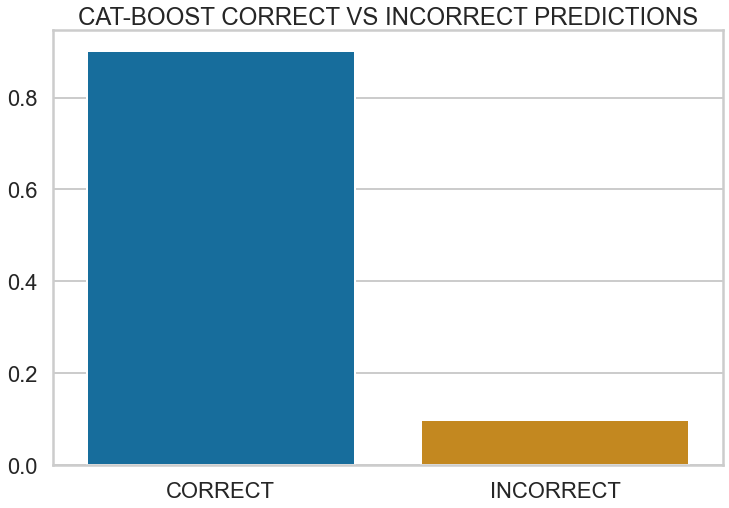

In [ ]:
num_correct = accuracy_score(y_test, y_pred_cat)
num_incorrect = 1 - num_correct

sns.set(style='whitegrid', context='poster', palette='colorblind', rc={'figure.figsize': (12, 8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[num_correct, num_incorrect])
plt.title('CAT-BOOST CORRECT VS INCORRECT PREDICTIONS')
plt.show()

## XGBoost

In [ ]:
import xgboost as xgb

xgboost = xgb.XGBClassifier().fit(X_train, y_train)

In [ ]:
y_pred_xgb = xgboost.predict(X_test)

In [ ]:
print("The Confusion Matrix is -")
print(confusion_matrix(y_test,y_pred_xgb))
print("The Classification Report Matrix is -")
print(classification_report(y_test,y_pred_xgb))

The Confusion Matrix is -
[[4392  438]
 [ 478 4421]]
The Classification Report Matrix is -
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      4830
           1       0.91      0.90      0.91      4899

    accuracy                           0.91      9729
   macro avg       0.91      0.91      0.91      9729
weighted avg       0.91      0.91      0.91      9729



### PREDICTION PLOTS

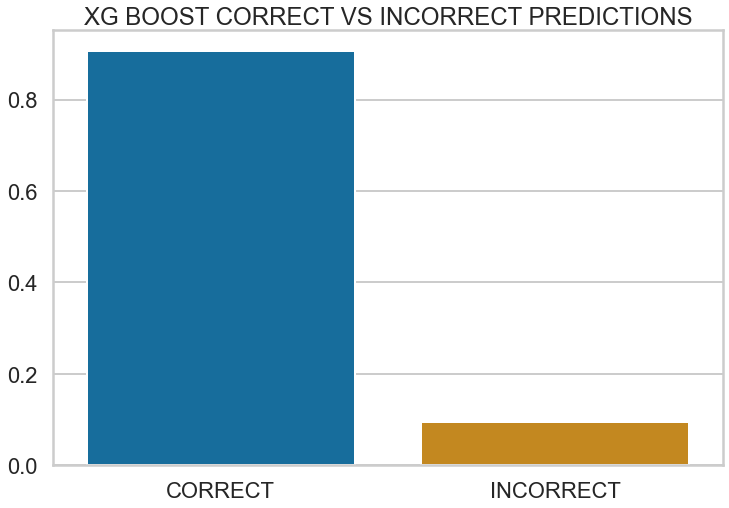

In [ ]:
num_correct = accuracy_score(y_test, y_pred_xgb)
num_incorrect = 1 - num_correct

sns.set(style='whitegrid', context='poster', palette='colorblind', rc={'figure.figsize': (12, 8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[num_correct, num_incorrect])
plt.title('XG BOOST CORRECT VS INCORRECT PREDICTIONS')
plt.show()

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.703 total time=  46.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.717 total time=  47.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.699 total time=  49.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.705 total time=  49.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.695 total time=  49.8s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.833 total time=  32.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.836 total time=  31.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.829 total time=  31.8s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.845 total time=  30.8s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.844 total time=  29.9s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.800 total time=  32.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.849 total time= 1.1min
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.841 total time= 1.2min
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.844 total time= 1.1min
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.847 total time= 1.2min
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.863 total time= 1.7min
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.863 total time= 1.7min
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.864 total time= 1.7min
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.863 total time= 1.8min
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.867 total time= 1.7min
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.865 total time= 1.1min
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.866 total time= 1.2min
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.866 total time= 1.1min
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
svm = SVC(C=10, gamma=0.1).fit(X_train, y_train)

In [ ]:
y_pred_svm = svm.predict(X_test)

The Confusion Matrix is -
[[4244  586]
 [ 602 4297]]
The Classification Report Matrix is -
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4830
           1       0.88      0.88      0.88      4899

    accuracy                           0.88      9729
   macro avg       0.88      0.88      0.88      9729
weighted avg       0.88      0.88      0.88      9729



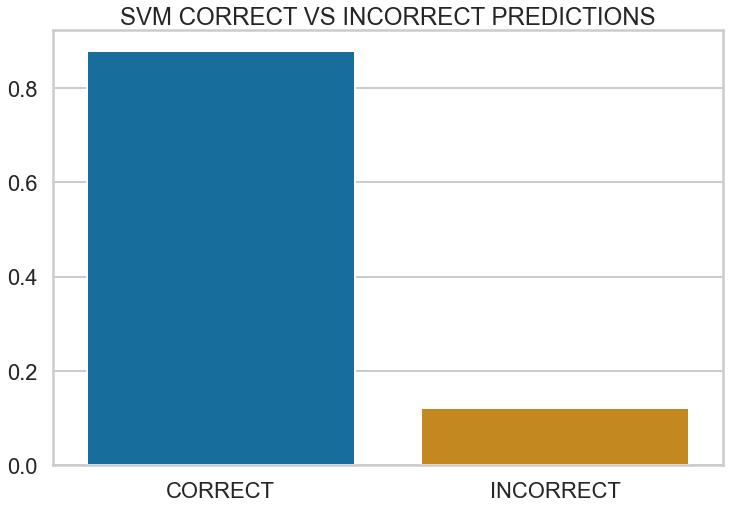

In [ ]:
print("The Confusion Matrix is -")
print(confusion_matrix(y_test,y_pred_svm))
print("The Classification Report Matrix is -")
print(classification_report(y_test,y_pred_svm))

### PREDICTION PLOTS

num_correct = accuracy_score(y_test, y_pred_svm)
num_incorrect = 1 - num_correct

sns.set(style='whitegrid', context='poster', palette='colorblind', rc={'figure.figsize': (12, 8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[num_correct, num_incorrect])
plt.title('SVM CORRECT VS INCORRECT PREDICTIONS')
plt.show()

## ANN

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Set the seed for reproducibility
np.random.seed(42)

# Define the number of input features
input_dim = X_train.shape[1]

# Define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
adam = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# Fit the model on the training data
model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/200
355/355 [==============================] - 5s 8ms/step - loss: 0.5578 - accuracy: 0.7079 - val_loss: 0.4246 - val_accuracy: 0.8050
Epoch 2/200
355/355 [==============================] - 3s 7ms/step - loss: 0.4588 - accuracy: 0.7923 - val_loss: 0.3973 - val_accuracy: 0.8175
Epoch 3/200
355/355 [==============================] - 3s 9ms/step - loss: 0.4275 - accuracy: 0.8073 - val_loss: 0.3815 - val_accuracy: 0.8216
Epoch 4/200
355/355 [==============================] - 2s 4ms/step - loss: 0.4117 - accuracy: 0.8157 - val_loss: 0.3762 - val_accuracy: 0.8282
Epoch 5/200
355/355 [==============================] - 1s 4ms/step - loss: 0.3995 - accuracy: 0.8222 - val_loss: 0.3612 - val_accuracy: 0.8381
Epoch 6/200
355/355 [==============================] - 1s 4ms/step - loss: 0.3923 - accuracy: 0.8216 - val_loss: 0.3582 - val_accuracy: 0.8356
Epoch 7/200
355/355 [==============================] - 1s 4ms/step - loss: 0.3892 - accuracy: 0.8255 - val_loss: 0.3500 - val_accuracy: 0.8401

In [64]:
y_pred_con= model.predict(X_test)
y_pred_ann = np.round(y_pred_con)

305/305 [==============================] - 1s 2ms/step


The Confusion Matrix is -
[[4191  639]
 [ 578 4321]]
The Classification Report Matrix is -
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4830
           1       0.87      0.88      0.88      4899

    accuracy                           0.87      9729
   macro avg       0.87      0.87      0.87      9729
weighted avg       0.87      0.87      0.87      9729



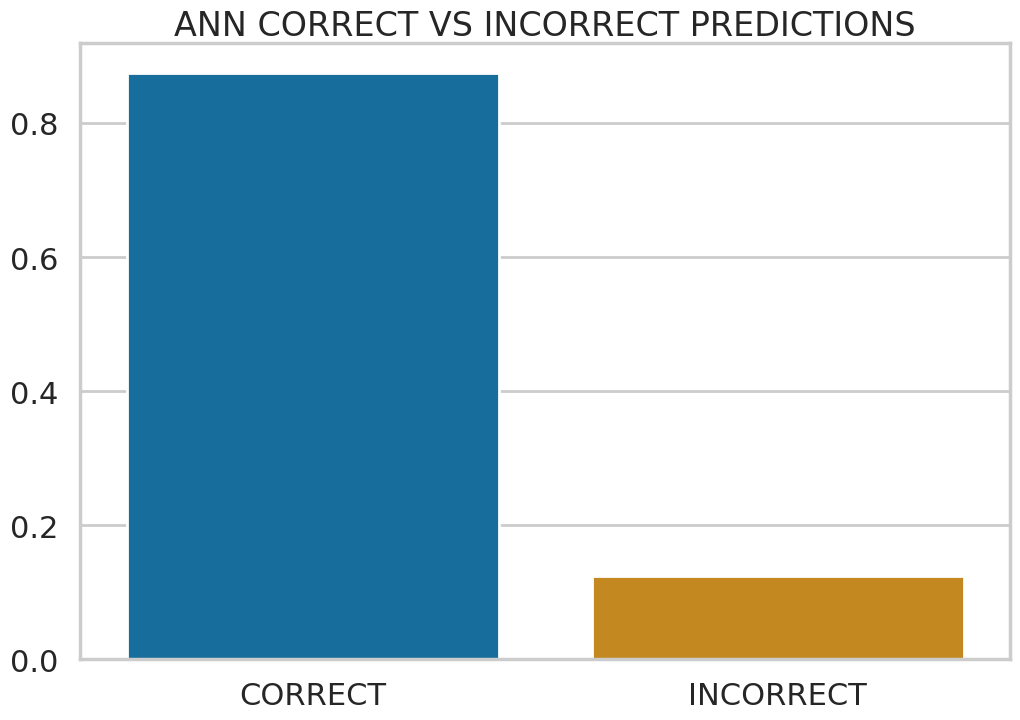

In [65]:
print("The Confusion Matrix is -")
print(confusion_matrix(y_test,y_pred_ann))
print("The Classification Report Matrix is -")
print(classification_report(y_test,y_pred_ann))

### PREDICTION PLOTS

num_correct = accuracy_score(y_test, y_pred_ann)
num_incorrect = 1 - num_correct

sns.set(style='whitegrid', context='poster', palette='colorblind', rc={'figure.figsize': (12, 8)})
sns.barplot(x=['CORRECT', 'INCORRECT'], y=[num_correct, num_incorrect])
plt.title('ANN CORRECT VS INCORRECT PREDICTIONS')
plt.show()